# Import the needed libraries

In [126]:
%pip install summarytools
%pip install ipywidgets
%pip install -U ydata-profiling

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from summarytools import dfSummary
from math import ceil
from ydata_profiling import ProfileReport

import scipy.stats as stats 

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Import the Data

In [127]:
# Data imports
train_data = pd.read_csv(r'../project_data/train_data.csv')
test_data = pd.read_csv(r'../project_data/test_data.csv')

/var/folders/hr/bvcr3w9n2gxgqdhjgthjjnv80000gn/T/ipykernel_36215/1448665868.py:2: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv(r'../project_data/train_data.csv')


### 1.1 Check data contents, provide descriptive statistics and check for incoherencies in the data.

In [128]:
# Check for column names in training data
print(train_data.columns)

# First 5 rows of the training data
train_data.head()

Index(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type',
       'Claim Identifier', 'Claim Injury Type', 'County of Injury',
       'COVID-19 Indicator', 'District Name', 'First Hearing Date', 'Gender',
       'IME-4 Count', 'Industry Code', 'Industry Code Description',
       'Medical Fee Region', 'OIICS Nature of Injury Description',
       'WCIO Cause of Injury Code', 'WCIO Cause of Injury Description',
       'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description',
       'WCIO Part Of Body Code', 'WCIO Part Of Body Description', 'Zip Code',
       'Agreement Reached', 'WCB Decision', 'Number of Dependents'],
      dtype='object')


,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
0,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
1,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,...,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
2,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,...,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
3,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,...,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0


In [129]:
train_data.tail()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
593466,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593467,2022-12-13,72.0,N,2022-12-31,N,0.0,1950.0,2022-12-31,NaN,TECHNOLOGY INSURANCE CO. INC.,...,25.0,FROM DIFFERENT LEVEL (ELEVATION),90.0,MULTIPLE PHYSICAL INJURIES ONLY,-9.0,MULTIPLE,12779,0.0,Not Work Related,3.0
593468,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593469,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593470,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
# Check for column names in test data
train_data.columns

# Find column names that don't exist in the test data but exist in the training data
missing_cols = [col for col in train_data.columns if col not in test_data.columns]

print("These will be the columns and the types of the columns that are not in testing data.\n"
    "We will try to predict these columns: \n" + str(missing_cols))


These will be the columns and the types of the columns that are not in testing data.
We will try to predict these columns: 
['Claim Injury Type', 'Agreement Reached', 'WCB Decision']


#### These will be the columns and description of the column from metadata that are not in testing data. These are the columns we are trying to predict: 
 
| Claim Injury Type | Agreement Reached | WCB Decision |
|------------------|-----------------------------------------------------------------|--------------|
|     **Main target variable**: Deliberation of the WCB relative to benefits awarded to the claim. **Numbering indicates severity**.       |     **Binary variable**: Yes if there is an agreement without the involvement of the WCB -> unknown at the start of a claim    |   **Multiclass variable**: Decision of the WCB relative to the claim: “Accident” means that claim refers to workplace accident, “Occupational Disease” means illness from the workplace. -> requires WCB deliberation so it is unknown at start of claim.    |



## Let's take more comprehensive look into data contents and let's make observations

In [131]:
# Check characteristics of the dataframe (null-values, data types, shape, etc.)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593471 entries, 0 to 593470
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Identifier          

### Descriptive statistics

In [167]:
# Check summary of the data
dfSummary(train_data)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Accident Date[datetime64[ns]],"Min: 1961-09-06Max: 2023-09-29Duration: 22,668 days",5539 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABNCAYAAACxBha+AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABY0lEQVR4nO3XQY5SURBA0f8MQZj8H0LCYliEi3UR7IYYGNgdB+ACRG0c3O7Ec6b1KqnBnbxxv98nKHx67wP4f4iNzOq9D+BjGmNsp2la/8Pqj/v9/vJoIDZ+McbY7vf7L/M8757dvV6v38YYXx8FJzYeWc/zvDsejy/Lsry+delyuWxOp9PufD6vp2kSG2+3LMvr4XD4/uTa9ncDHwQyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjKrPw3HGJtpmj5Ht/BxzLfbbXW5XDbPLP3t/U87likkZGzxgwAAAABJRU5ErkJggg=="">",0(0.0%)
2,Age at Injury[int64],Mean (sd) : 42.4 (13.9)min < med < max:0.0 < 42.0 < 117.0IQR (CV) : 23.0 (3.1),108 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKQAAABACAYAAACUYNzVAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACWElEQVR4nO3dMY7aQBiG4X/CQgxEBkQCHS1FpBSUHCKHzRFSUKSh4QZ0CINAOHgx4DSbLCvtJrKx40/wPv2IKV4jzcCMXZIkBqh4V/YEgEsPZU/gNc65upnVMg4/JEmyz3M++H/kgnTO1bvd7lff9ztZxm+327Vz7luWKHkQyicXpJnVfN/vjMfjfavVitIM3Gw23mQy6QRBUDOzVHGU+SDgmWKQZmbWarWiXq/3M8PQesaPLOVBwEuyQZalhAcBF1hlQwpBQgpBQgpBQgpBQsrNrbJPp1PVzHznXNqh/vl8rhYwJaRwU0GGYViN4/jLYDCoVCqVVHuJcRx7p9PpcxRF380sy7YPcnBTQR4OhwfP8xqj0Sjq9/vrNGPn83lnNps1jsdjpaj54d9uKsjfms1m6s3t9XrNxrYAFjWQQpCQQpCQQpCQQpCQQpCQQpCQQpCQQpCQQpCQQpCQQpCQQpCQQpCQQpCQQpCQQpCQQpCQcpNHGMpwxWlHM67y+4Mgc3DNaUczrvK7RJA5uOa0I1f5vUSQOcpy2vEJJx6fsKiBFIKEFIKEFIKEFIKEFIKElMK2fa54CRH3NN6xQoK85iVE3NN434r6hsz8EiLuabxvhf5Sk+UlRNzTeN9Y1EAKQUIKQUIKQUIKQUIKQUIKQUIKQUIKQUIKQUIKQUIKQUIKQUIK57IFcA3Ls78Gyb++i8c1LC+9GWQe//peLpc/0o7d7XaemVkYht5isWjc+tjVavXB87zGcDh07Xb7Mc3Y/X7/fjqdfgqC4KNzbptmbMkekyR59eH7BSGBCwQLp1F0AAAAAElFTkSuQmCC"">",0(0.0%)
3,Alternative Dispute Resolution[bool],1. False2. True,"567,740 (99.5%)2,592 (0.5%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABG0lEQVR4nO3bMY6DMBRF0e/IiiaNLfQlFsMi0s4+ZxFsB/GLJKLxFJMsgWfJc09F+YorBAin1poBCsnMbmZ27T0Ewzuyu99LKVPvJRhbRGy5lDIty/Kstb56D8KY9n3/Wtd1ymZmtdbXPM+P3qMwtNul9wL8H8QGGWKDDLFBhtggQ2yQITbIEBtkiA0yxAYZYoMMsUGG2CBDbJAhNshks7+f23oPwbg+fSV3/+a3cJwtIjYOvEDlSBzlg8rnzmattWfnLRhcdve7mVlK6YfgcKZLKWV6vyDw3IZT8Z0NMsQGGWKDDLFBhtggQ2yQITbIEBtkiA0yxAYZYoMMsUGG2CBDbJAhNsgQG2SIDTI5Irb39dF1CYbHgRfI/ALJFjRJDx7WYQAAAABJRU5ErkJggg=="">",0(0.0%)
4,Assembly Date[datetime64[ns]],"Min: 2020-01-01Max: 2022-12-31Duration: 1,095 days",897 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABNCAYAAACxBha+AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACyElEQVR4nO3dsU7bUBiG4f8kBDlAHUWhYcvSsVKHjCy9g15s124gwQ1k6NKJBSFFwVFcohgnXahUVbLJceIvdvw+Kxw4w2uf3w4SbrPZGKDQOvQG0BzEBpmTQ28A23HOdc3stMDS1Wazedn3foogthpwznUHg8G3MAz7vmvn8/nMOfe9CsERWz2chmHYv76+fun1esttF0VRFNze3g6n0+mlc27u+Tv3fkckthrp9XrL4XD4e9vvj+O4kyTJl9Fo1G6321tHamb2/Py8cM79MDOvdZYTaaNj22EOMqvQLJRltVqdBEFwNh6Pl1dXV7Nt1z0+Pn64v7//OhqNLn0jzTu2GxvbLnOQWTlXflnOz8+97oiz2axbJNIoioK7u7v+dDo9NTNi+0ehOcisvCu/anwjfdPN+kKTYzMz/znIbLcrv+DAHq7X647PHquo8bHtwvfKLzqwJ0kSpGn6eblc3piZ752mMnJjO4YXiVVSdGB/eHjoTyaTs9fX13aZ+ytbZmyHeJG4Q9wtM1t7rjnY0VRkYC9zPyp5d7bCLxLznkiyFI07TdNOHMefLi4ufrVarWTbdcdyNNXJuzNbkQHacp5IchSK++2I+Tgej3828Wiqk8o9IPjG/feIaerRVCf8iRFkiA0yxAYZYoNMKQ8IaZp2zCx0zvksO4qPZJBt77E1/SMZZNt7bE3/SAbZSnvPxnsv/I8HBMgQG2SIDTLEBhligwyxQYbYIENskCE2yBAbZIgNMsQGGWKDDLFBhtggQ2yQITbIEBtkiA0yxAYZYoMMsUGG2CBDbJAhNsgQG2SIDTLEBhligwyxQYbYIENskCE2yBAbZIgNMsQGGWKDDLFBhtggQ2yQITbIEBtkiA0yxAYZYoMMsUGG2CBDbJAhNsgQG2SIDTLv/o/4KIoCnx+4

In [133]:
# Check the descriptive statistics for non-object values
train_data.describe(exclude='object').round(2)

,Age at Injury,Average Weekly Wage,Birth Year,Claim Identifier,IME-4 Count,Industry Code,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Agreement Reached,Number of Dependents
count,574026.00,545375.00,544948.00,5.934710e+05,132803.00,564068.00,0.0,558386.00,558369.00,556944.00,574026.00,574026.00
mean,42.11,491.09,1886.77,2.366760e+07,3.21,58.65,NaN,54.38,41.01,39.74,0.05,3.01
std,14.26,6092.92,414.64,1.079271e+08,2.83,19.64,NaN,25.87,22.21,22.37,0.21,2.00
min,0.00,0.00,0.00,5.393066e+06,1.00,11.00,NaN,1.00,1.00,-9.00,0.00,0.00
25%,31.00,0.00,1965.00,5.593414e+06,1.00,45.00,NaN,31.00,16.00,33.00,0.00,1.00
50%,42.00,0.00,1977.00,5.791212e+06,2.00,61.00,NaN,56.00,49.00,38.00,0.00,3.00
75%,54.00,841.00,1989.00,5.991000e+06,4.00,71.00,NaN,75.00,52.00,53.00,0.00,5.00
max,117.00,2828079.00,2018.00,9.998917e+08,73.00,92.00,NaN,99.00,91.00,99.00,1.00,6.00


In [134]:
# Check the descriptive statistics for object values
train_data.describe(include='object')

,Accident Date,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,...,District Name,First Hearing Date,Gender,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Description,WCIO Nature of Injury Description,WCIO Part Of Body Description,Zip Code,WCB Decision
count,570337,574026,593471,574026,559466,187245,574026,574026,574026,574026,...,574026,150798,574026,564068,574026,558386,558369,556944,545389,574026
unique,5539,3,1096,2,2475,1648,2046,8,8,63,...,8,1094,4,20,5,74,56,54,10060,1
top,2020-03-01,N,2020-03-06,N,2021-05-11,2021-04-21,STATE INSURANCE FUND,1A. PRIVATE,2. NON-COMP,SUFFOLK,...,NYC,2022-04-15,M,HEALTH CARE AND SOCIAL ASSISTANCE,IV,LIFTING,STRAIN OR TEAR,LOWER BACK AREA,11236,Not Work Related
freq,1245,571412,1422,392291,1847,350,111144,285368,291078,60430,...,270779,440,335218,114339,265981,46610,153373,51862,3302,574026


In [135]:
# Check for duplicates
train_data.duplicated().sum()

np.int64(0)

In [136]:
# Check data for missing values
train_data.isna().sum()

# We can already replace empty strings "" by nans
train_data.replace("", np.nan, inplace=True)

# Check data for missing values again
train_data.isna().sum()

Accident Date                          23134
Age at Injury                          19445
Alternative Dispute Resolution         19445
Assembly Date                              0
Attorney/Representative                19445
Average Weekly Wage                    48096
Birth Year                             48523
C-2 Date                               34005
C-3 Date                              406226
Carrier Name                           19445
Carrier Type                           19445
Claim Identifier                           0
Claim Injury Type                      19445
County of Injury                       19445
COVID-19 Indicator                     19445
District Name                          19445
First Hearing Date                    442673
Gender                                 19445
IME-4 Count                           460668
Industry Code                          29403
Industry Code Description              29403
Medical Fee Region                     19445
OIICS Natu

In [137]:
# Find all metric and non-metric columns
non_metric_cols = list(train_data.describe(include='object').columns)
metric_cols = list(train_data.describe(exclude='object').columns)

# At this point, while studying relationships of fetaure variables, we can exclude variables that we are trying to predict

non_metric_cols.remove('WCB Decision')
non_metric_cols.remove('Claim Injury Type')
metric_cols.remove('Agreement Reached')

# Check the columns
print("Non-metric columns: \n" + str(non_metric_cols))
print("Metric columns: \n" + str(metric_cols))

# Move some columns (identified as categorial/non-metric) to non-metric columns and remove from metric columns

# Claim identifier (just an identifier)
non_metric_cols.append('Claim Identifier')
metric_cols.remove('Claim Identifier')

# Industry code (categorical)
non_metric_cols.append('Industry Code')
metric_cols.remove('Industry Code')

# OIICS Nature of Injury Description (categorical)
non_metric_cols.append('OIICS Nature of Injury Description')
metric_cols.remove('OIICS Nature of Injury Description')

# WCIO Cause of Injury Code, WCIO Nature of Injury Code, WCIO Part Of Body Code (categorical)
non_metric_cols.append('WCIO Cause of Injury Code')
non_metric_cols.append('WCIO Nature of Injury Code')
non_metric_cols.append('WCIO Part Of Body Code')

metric_cols.remove('WCIO Cause of Injury Code')
metric_cols.remove('WCIO Nature of Injury Code')
metric_cols.remove('WCIO Part Of Body Code')



# Check the columns again
print("Non-metric columns: \n" + str(non_metric_cols))
print("Metric columns: \n" + str(metric_cols))

# Check that all columns (but three, the ones we are predicting) are accounted for
print(len(train_data.columns))
print(len(non_metric_cols) + len(metric_cols))

# Check that not any non-metric column is in the metric columns
for col in non_metric_cols:
    if col in metric_cols:
        print(col)


Non-metric columns: 
['Accident Date', 'Alternative Dispute Resolution', 'Assembly Date', 'Attorney/Representative', 'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type', 'County of Injury', 'COVID-19 Indicator', 'District Name', 'First Hearing Date', 'Gender', 'Industry Code Description', 'Medical Fee Region', 'WCIO Cause of Injury Description', 'WCIO Nature of Injury Description', 'WCIO Part Of Body Description', 'Zip Code']
Metric columns: 
['Age at Injury', 'Average Weekly Wage', 'Birth Year', 'Claim Identifier', 'IME-4 Count', 'Industry Code', 'OIICS Nature of Injury Description', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Number of Dependents']
Non-metric columns: 
['Accident Date', 'Alternative Dispute Resolution', 'Assembly Date', 'Attorney/Representative', 'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type', 'County of Injury', 'COVID-19 Indicator', 'District Name', 'First Hearing Date', 'Gender', 'Industry Code Description', 'Me

In [138]:
# # To get initial but comprehensive report on the data (missing values, types of data etc)
# profile = ProfileReport(
#     train_data,
#     title='New York Workers’ Compensation Board Data',
#     correlations={
#         "pearson": {"calculate": True},   # Linear correlation
#         "spearman": {"calculate": True},  # Non-linear/ordinal correlation
#         "kendall": {"calculate": True},   # For ranked data
#         "phi_k": {"calculate": True},     # Categorical correlation
#         "cramers": {"calculate": True},   # Association between categorical variables
#     },
#     missing_diagrams={
#         "bar": True,          # Bar chart for missing data
#         "matrix": True,       # Heatmap-like missing data matrix
#         "dendrogram": True,   # Hierarchical clustering of missing values
#     }
# )

# profile.to_notebook_iframe()

## Visual explorations

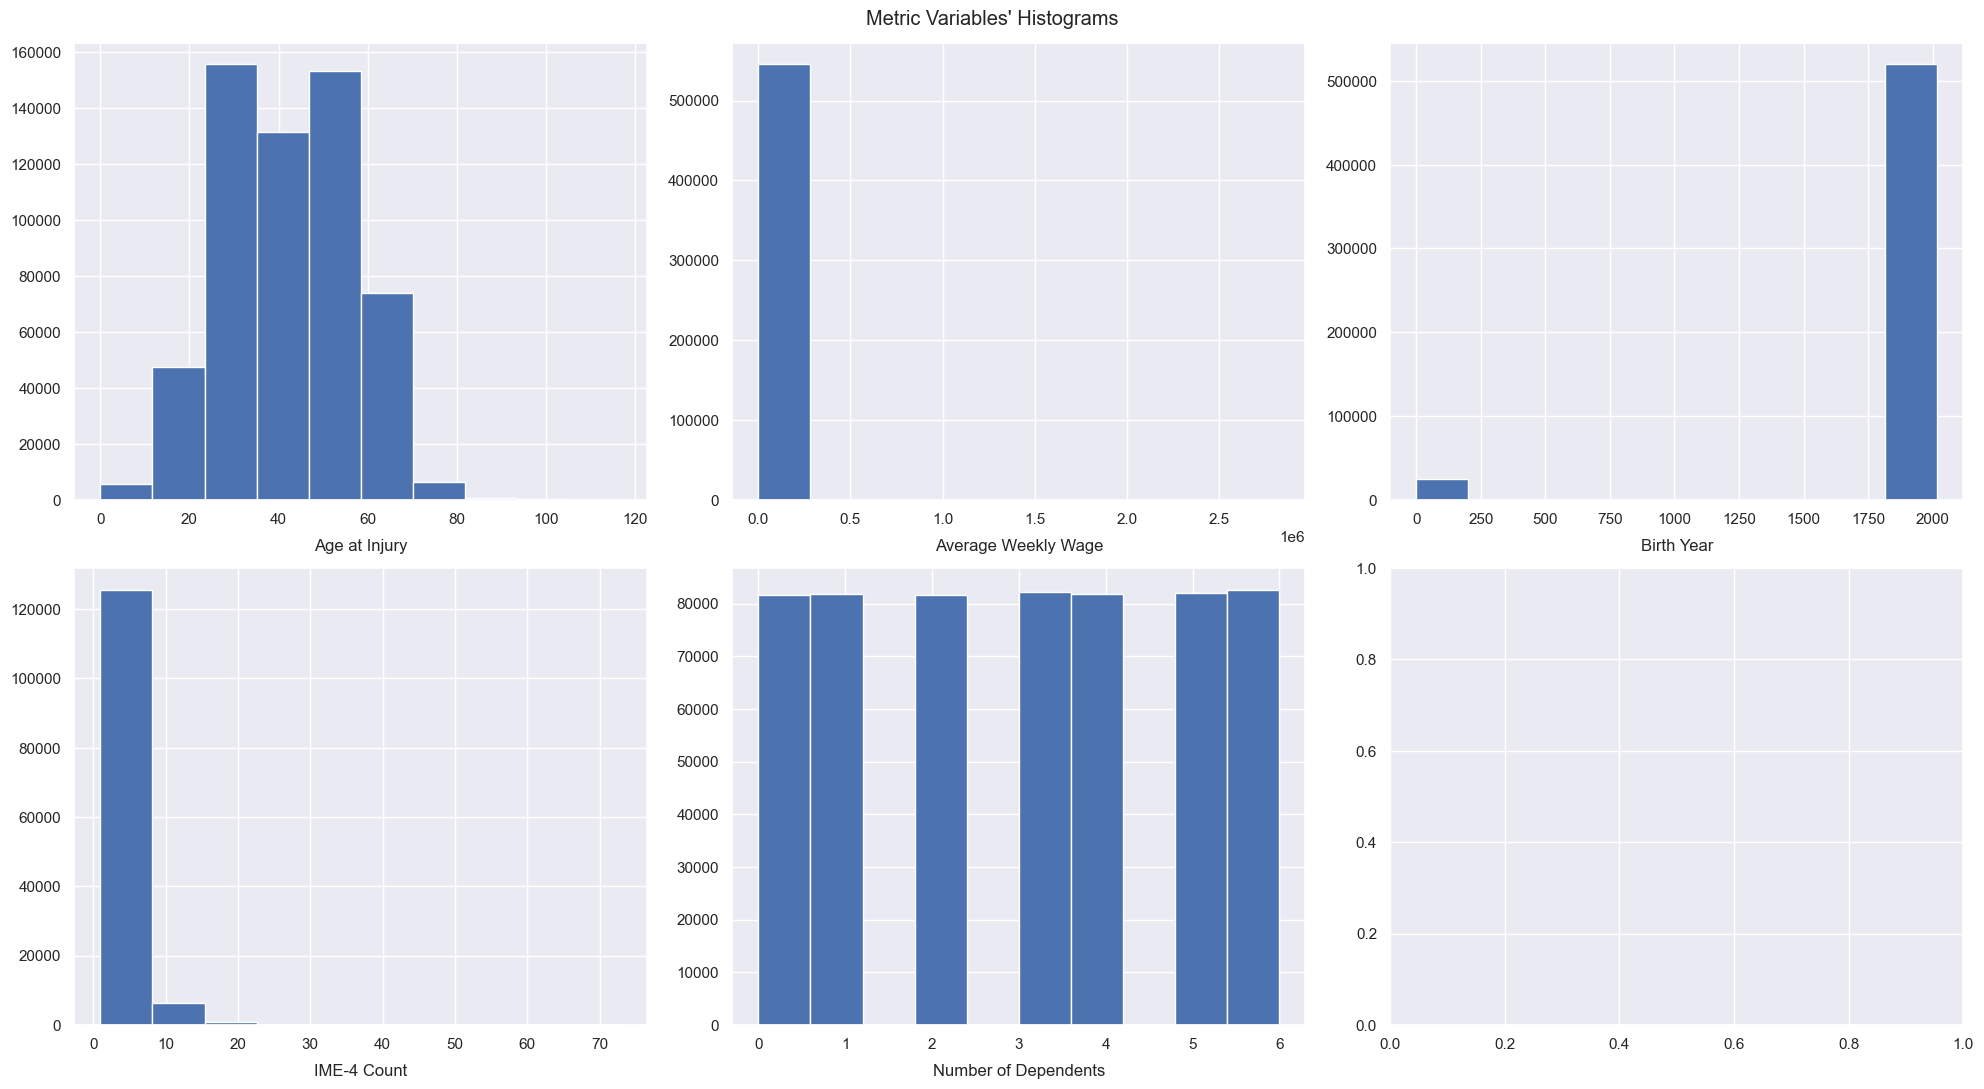

In [139]:
# Plot all Numeric Variables' Histograms in one figure

sns.set() ## Reset to darkgrid

# Prepare figure. Create individual axes where each histogram will be placed
sp_rows = 2
sp_cols = ceil(len(metric_cols) / sp_rows) 


# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11),
                        tight_layout=True)

# Plot data
# Iterate across axes objects and associate each histogram
for ax, feat in zip(axes.flatten(), metric_cols): 
    ax.hist(train_data[feat])
    ax.set_title(feat, y=-0.13)
    
# Layout
# Add a centered title to the figure:
title = "Metric Variables' Histograms"

plt.suptitle(title)

plt.show()

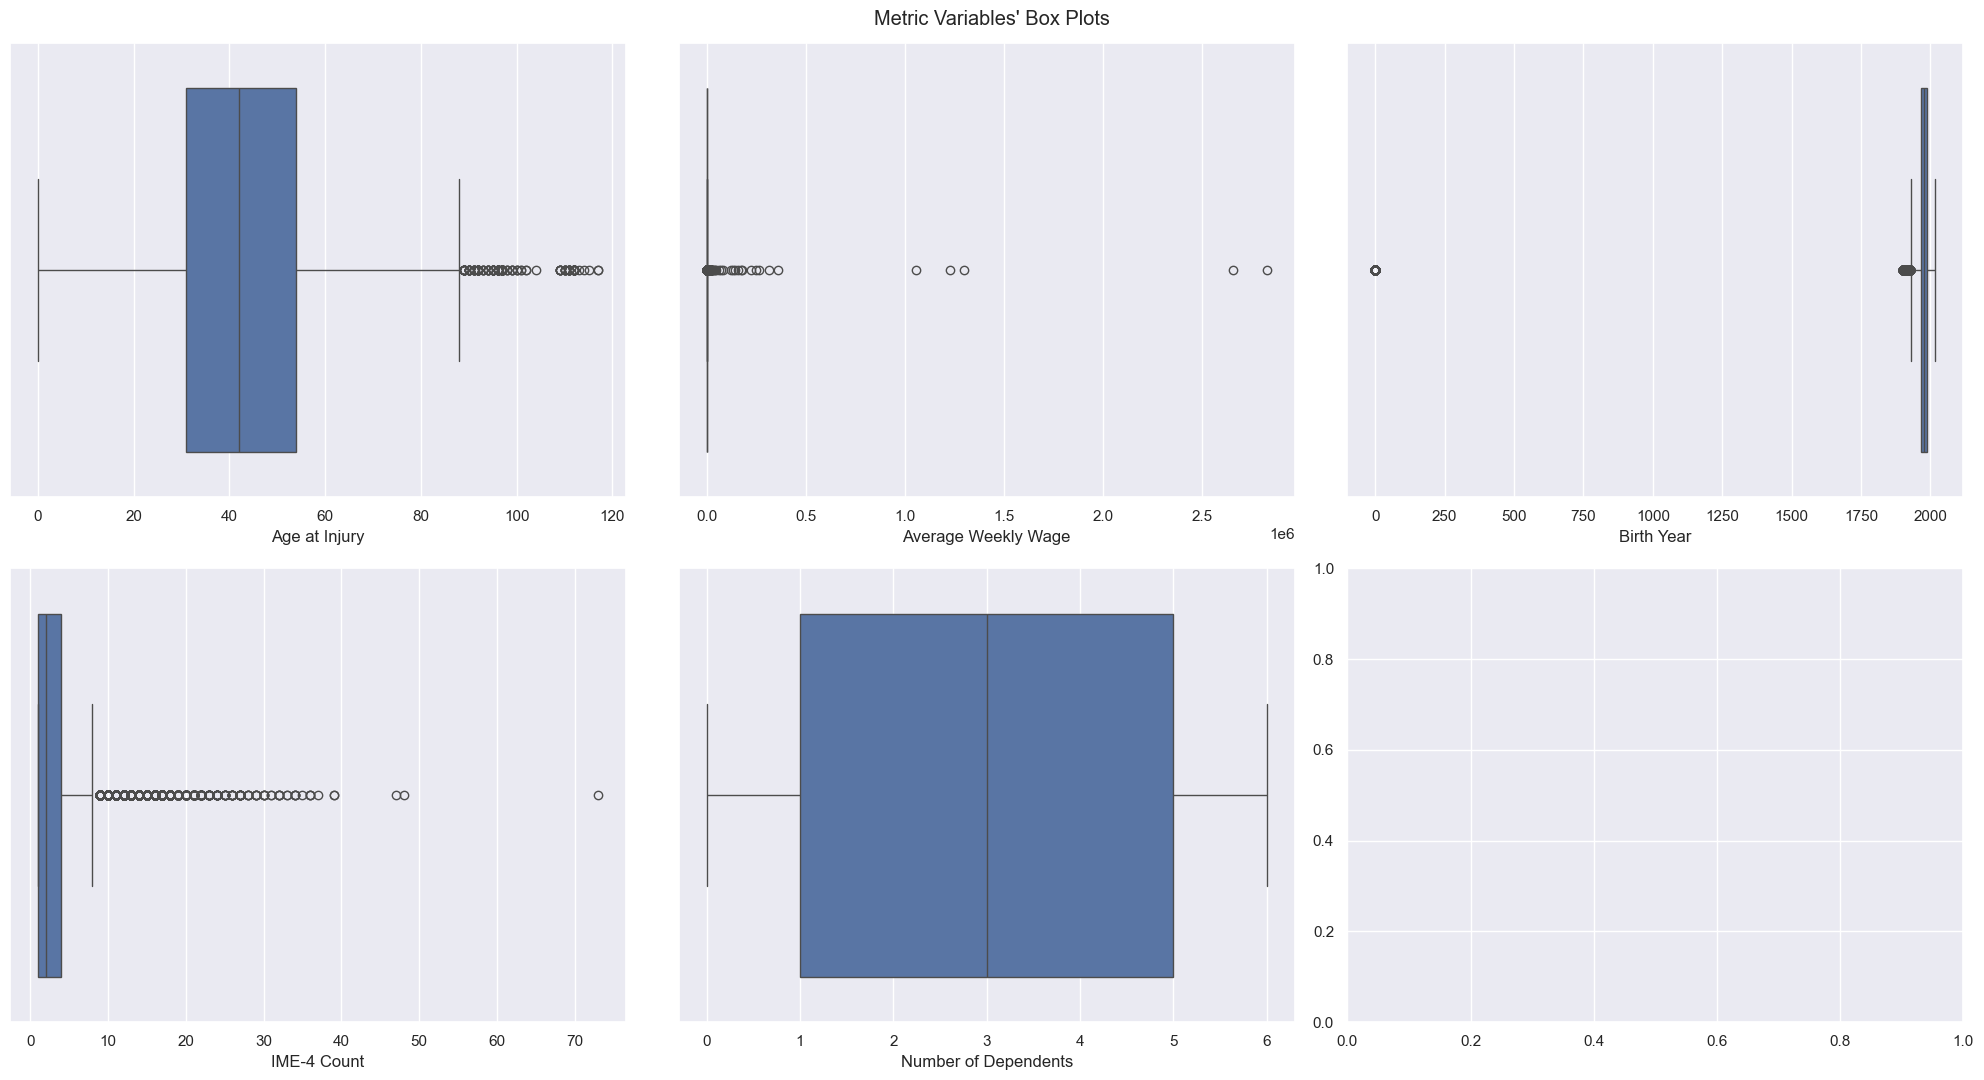

In [140]:
# Plot ALL Numeric Variables' Boxplots in one figure

sns.set() ## Reset to darkgrid

sp_rows = 2
sp_cols = ceil(len(metric_cols) / sp_rows)


# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11),
                         tight_layout=True
                        )

# Plot data
# Iterate across axes objects and associate each histogram 
for ax, feat in zip(axes.flatten(), metric_cols): 
    sns.boxplot(x=train_data[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Metric Variables' Box Plots"

plt.suptitle(title)

plt.show()

## Notes, incoherensies and Conclusions on Data Exploration


* General:
    * Number of dependents -column is not in metadata. It maybe refers to to the number of people who are financially dependent on the injured worker.
    * OIICS Nature of Injury is full of missing values
    * Few of the columns had class imbalances (mentioned below)
    * **Target variable: WCB Decision** is either missing(3.3% of cases) or **always** just Non work related

* Null-values and missing values:
    * 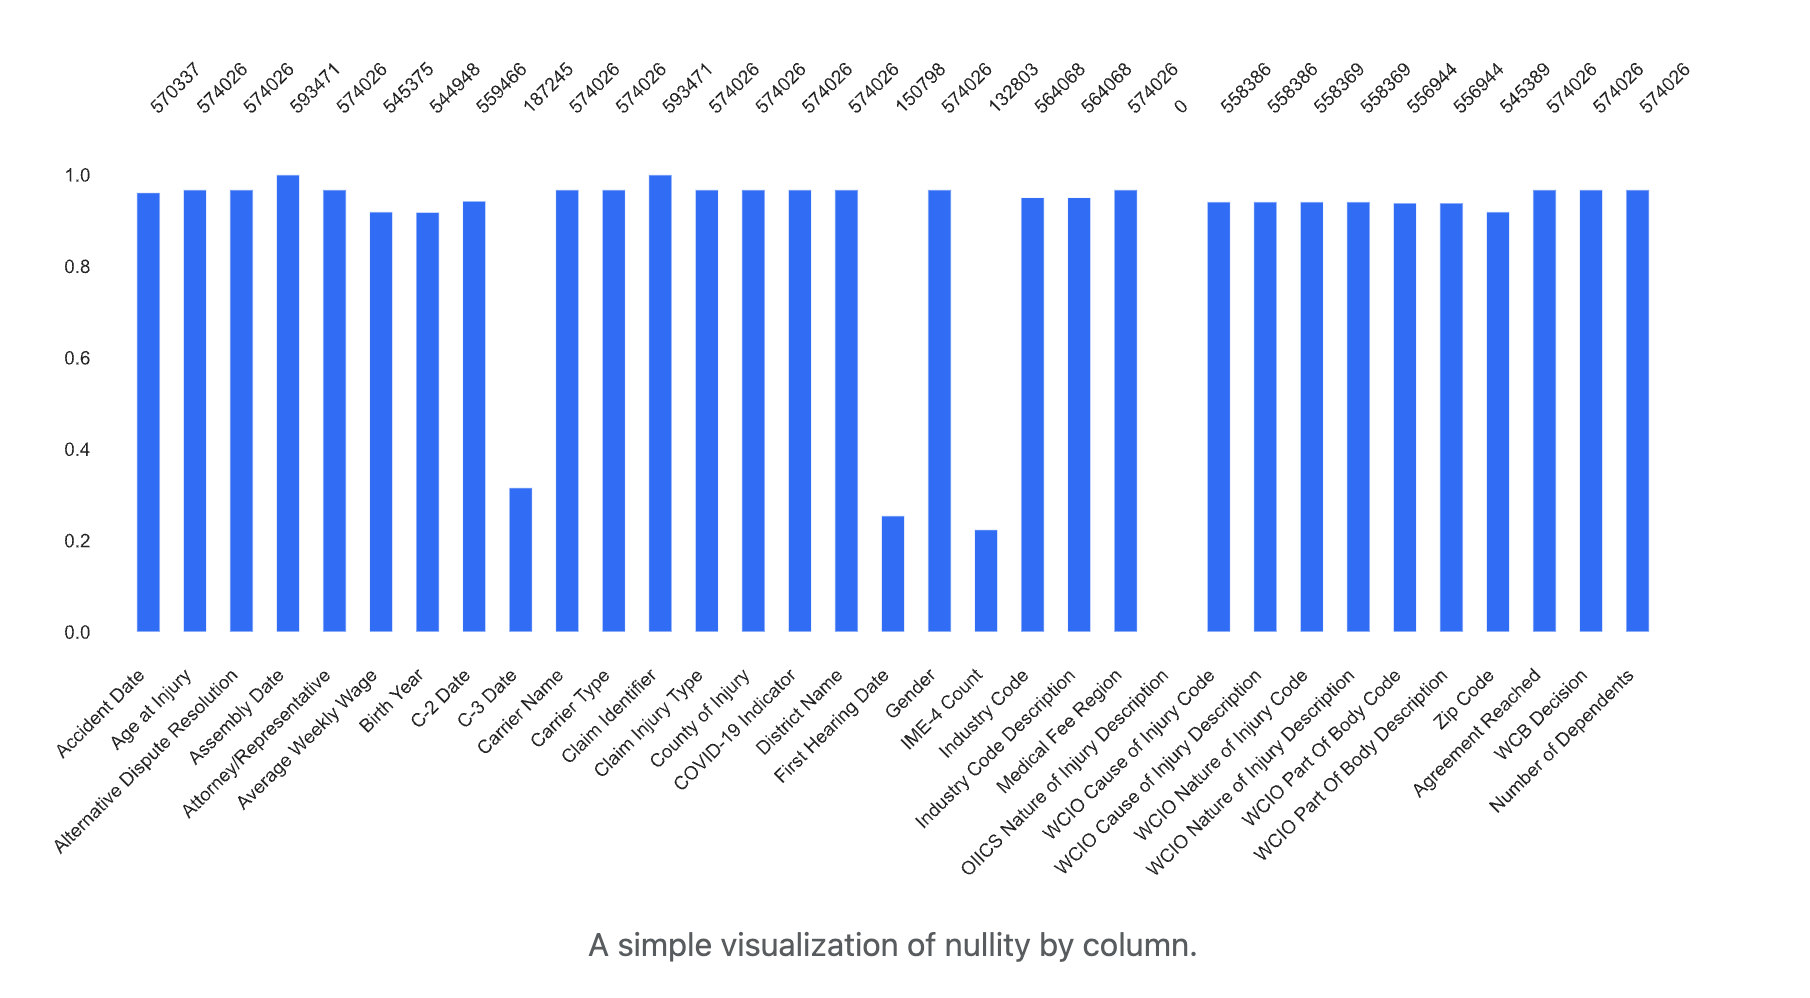


    * **19445 seems to be usual number for missing values!! --> Probably 19445 rows with null-values in almost every field. Those probably can be deleted**
    * **OIICS Nature of Injury is that full of missing values!!**
    * Accident date: 23134 missing values (3.9% of data)
    * Age at injury: 19445 missing values (3.3% of data)
    * Alternative Dispute Resolution: same as above
    * Attorney/Rep... : same as above
    * Averegae weekly wage:
        * Missing: (8.1%)
        * **Zeros: 335450 so over 56% of data is zeros**
    * Birth year:
        * Missing values (8.1%)
        * Zeros (4.2%)
    * C-2 date: 5.7% missing
    * C-3 date: **68.4% missing**
    * Carrier name: 19445 missing values (3.3% of data)
    * Carrier type: Same as above
    * County of injury: Same as above
    * COVID 19 Indicator: Same as above
    * Gender, District Name, First hearing date: Same as above
    * IM-4 Count: **77.6% Missing**
    * Industry code: 5% Missing
    * Industry code Desc.: Same as above
    * Medical Fee Region: 19445 missing values (3.3% of data)
    * ALL WCIO.. columns: 5.9-6.2 % Missing
    * Zip Code: 8% missing
    * **TARGET VARIABLE Agreement Reached: 19445 missing values (3.3% of data)**
    * **TARGET VARIABLE: Claim injury type: 19445 missing values (3.3% of data)**
    * **TARGET VARIABLE: WCB Decision: 19445 missing values (3.3% of data)**
    
    

* Types:
    * Attorney/Representative --> Should be Bool
    * COVID 19 Indicator --> SHould be Bool
    * **TARGET VARIABLE Agreement Reached --> Should be Bool**
    * Age and year of birth could be int instead of float

* Duplicates
    * 1 Duplicate claim identifier --> Drop rows!

* Imbalances
    * Alternative Dispute Resolution: **Massive class imbalance** (N dominates)
    * Attorney/Representative: Some class imbalance
    * COVID 19 Indicator: **Massive class imbalance** (False dominates)
    * **TARGET VARIABLE Agreement Reached: Massive class imbapance (72% 0 dominates)**


* More
    * Max age 117 (maybe we can threshold age to be less than 100) and **min age is 0 and there was 5464 instances of those!** 

* Analysis on histograms and boxplots
    * We can already see (in for example, Birth Year and IME4 -Count) that outliers are messing up some of our plots. We need to do outlier processing later on.
    * Birth year mean is near 1886 while age mean is near 42. 0 -values in birth year effect Birth year statistics. Null value handling important.
    * More?


# Data-set cleaning, preprocessing, feature engineering

HERE:
- Data type conversions
- Outlier handling
- Null value handling
- Duplicates

In [141]:
# 1. Datatype conversions

# DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
# Checking column 29 values for mixed types
print(train_data.columns[29])
print(train_data['Zip Code'].unique())

# Because it is ZipCode we will treat the values as string.
train_data['Zip Code'] = train_data['Zip Code'].astype(str)
test_data['Zip Code'] = test_data['Zip Code'].astype(str)

Zip Code
['13662' '14569' '12589' ... 'G9B0Y' '15143' '07122']


In [142]:
# 1. Datatype conversions

# Setting the index to Claim Identifier
train_data = train_data.set_index('Claim Identifier', drop=True)
non_metric_cols.remove('Claim Identifier')

# Dates to maatching format
train_data ['Accident Date'] = pd.to_datetime(train_data ['Accident Date'])
train_data ['Assembly Date'] = pd.to_datetime(train_data ['Assembly Date'])
train_data ['C-2 Date'] = pd.to_datetime(train_data ['C-2 Date'])
train_data ['C-3 Date'] = pd.to_datetime(train_data ['C-3 Date'])
train_data ['First Hearing Date'] = pd.to_datetime(train_data ['First Hearing Date'])


In [143]:
# 1. Datatype conversions

#Booleans 

# Attorney/Representative
train_data['Attorney/Representative'] = train_data['Attorney/Representative'].map({'Y': True, 'N': False}).astype('boolean')

# COVID-19 Indicator
train_data['COVID-19 Indicator'] = train_data['COVID-19 Indicator'].map({'Y': True, 'N': False}).astype('boolean')

# Agreement Reached
train_data['Agreement Reached'] = train_data['Agreement Reached'].astype(float)
train_data['Agreement Reached'] = train_data['Agreement Reached'].map({1: True, 0: False}).astype('boolean')

print(train_data['Attorney/Representative'].unique())
print(train_data['COVID-19 Indicator'].unique())
print(train_data['Agreement Reached'].unique())

<BooleanArray>
[False, True, <NA>]
Length: 3, dtype: boolean
<BooleanArray>
[False, <NA>, True]
Length: 3, dtype: boolean
<BooleanArray>
[False, True, <NA>]
Length: 3, dtype: boolean


In [144]:
# 2. Data cleaning

# Alternative Dispute Resolution. We will drop the rows with 'U' values since we assume that it means unknown. There is only 5 rows with 'U' values.
train_data = train_data[train_data['Alternative Dispute Resolution'] != "U"]
train_data['Alternative Dispute Resolution'] = train_data['Alternative Dispute Resolution'].map({'Y': True, 'N': False}).astype('boolean')

print(train_data['Alternative Dispute Resolution'].unique())

<BooleanArray>
[False, <NA>, True]
Length: 3, dtype: boolean


In [145]:
# 2. Data cleaning

# Check for duplicates in claim identifier which is the index
print(train_data.index.duplicated().sum())

# Access the duplicated claim identifier rows. The duplicated claim identifier is 292668076
train_data[train_data.index.duplicated()]

#Check length of the train data
print(len(train_data))

# Drop the duplicated claim identifier row with claim identifier of 292668076 because we can't have duplicate claim identifiers. We don't know which one is correct.
if(train_data.index.duplicated().sum() > 0):
    train_data.drop(index=292668076, inplace=True)

# Check for duplicates in claim identifier to make sure the duplicated claim identifier is dropped
print(train_data.index.duplicated().sum())

# Check length of the train data to make sure the duplicated claim identifier is dropped
print(len(train_data))

1
593466
0
593464


In [146]:
# 2. Data cleaning - Missing values

# Check for missing values and calculate percentage of missing values
print(train_data.isnull().sum())
missing_percentage_train = (train_data.isnull().sum() / len(train_data)) * 100

Accident Date                          23132
Age at Injury                          19443
Alternative Dispute Resolution         19443
Assembly Date                              0
Attorney/Representative                19443
Average Weekly Wage                    48093
Birth Year                             48521
C-2 Date                               33998
C-3 Date                              406220
Carrier Name                           19443
Carrier Type                           19443
Claim Injury Type                      19443
County of Injury                       19443
COVID-19 Indicator                     19443
District Name                          19443
First Hearing Date                    442666
Gender                                 19443
IME-4 Count                           460662
Industry Code                          29397
Industry Code Description              29397
Medical Fee Region                     19443
OIICS Nature of Injury Description    593464
WCIO Cause

In [147]:
# 2. Data cleaning - Missing values

# Only missing value columns, sorted descending
missing_percentage_train_filtered = missing_percentage_train[missing_percentage_train > 0].sort_values(ascending=False)
print("Missing Percentage Train Data:\n", missing_percentage_train_filtered)

Missing Percentage Train Data:
 OIICS Nature of Injury Description    100.000000
IME-4 Count                            77.622569
First Hearing Date                     74.590203
C-3 Date                               68.448971
Birth Year                              8.175896
Average Weekly Wage                     8.103777
WCIO Part Of Body Code                  6.153701
WCIO Part Of Body Description           6.153701
WCIO Nature of Injury Description       5.913585
WCIO Nature of Injury Code              5.913585
WCIO Cause of Injury Description        5.910721
WCIO Cause of Injury Code               5.910721
C-2 Date                                5.728738
Industry Code                           4.953460
Industry Code Description               4.953460
Accident Date                           3.897793
Medical Fee Region                      3.276189
Agreement Reached                       3.276189
WCB Decision                            3.276189
Gender                               

In [148]:
#2. Data cleaning - Missing values

# Because of %100 missing values we dropped OIICS Nature of Injury Description
train_data.drop(columns=['OIICS Nature of Injury Description'], inplace=True)
non_metric_cols.remove('OIICS Nature of Injury Description')

# We fill na with 0 because we assume that there was 0 submission made.
train_data['IME-4 Count'] = train_data['IME-4 Count'].fillna(0)

# As mentioned in data desciption "A blank date means the claim has not yet had ahearing held." so we filled with none.
train_data['First Hearing Date'] = train_data['First Hearing Date'].fillna(pd.NaT)

# We also treated these dates like First Hearing Date.
train_data['C-3 Date'] = train_data['C-3 Date'].fillna(pd.NaT)
train_data['C-2 Date'] = train_data['C-2 Date'].fillna(pd.NaT)



In [149]:
# 2. Data cleaning - Missing values

# Check for missing values
print(train_data.isnull().sum().sort_values(ascending=False))

# Percentage of missing values for Columns
new_missing_percentage_train = (train_data.isnull().sum() / len(train_data)) * 100

# Only missing value columns, sorted descending
new_missing_percentage_train_filtered = new_missing_percentage_train[new_missing_percentage_train > 0].sort_values(ascending=False)

# Missing Percentage Train Data
print(new_missing_percentage_train_filtered)

First Hearing Date                   442666
C-3 Date                             406220
Birth Year                            48521
Average Weekly Wage                   48093
WCIO Part Of Body Description         36520
WCIO Part Of Body Code                36520
WCIO Nature of Injury Description     35095
WCIO Nature of Injury Code            35095
WCIO Cause of Injury Description      35078
WCIO Cause of Injury Code             35078
C-2 Date                              33998
Industry Code                         29397
Industry Code Description             29397
Accident Date                         23132
District Name                         19443
Age at Injury                         19443
WCB Decision                          19443
Agreement Reached                     19443
Alternative Dispute Resolution        19443
Attorney/Representative               19443
Carrier Name                          19443
Carrier Type                          19443
Claim Injury Type               

In [150]:
# 2. Data cleaning - Missing values

"""As we can see, there seems to be 19443 rows that are missing columns:
District Name                         19443
Age at Injury                         19443
WCB Decision                          19443
Agreement Reached                     19443
Alternative Dispute Resolution        19443
Attorney/Representative               19443
Carrier Name                          19443
Carrier Type                          19443
Claim Injury Type                     19443
Medical Fee Region                    19443
County of Injury                      19443
COVID-19 Indicator                    19443
Gender                                19443
Number of Dependents                  19443
"""

# Let's check id these are all same rows. If they are, they can be deleted since they have so much missing values.

# Check if the rows with missing values in the specified columns are the same
missing_rows = train_data[
    train_data[['Age at Injury', 'WCB Decision', 'Medical Fee Region', 'Gender', 'Number of Dependents', 
                'District Name', 'County of Injury', 'Claim Injury Type', 'Carrier Type', 'Carrier Name', 'Agreement Reached',
                 'Alternative Dispute Resolution', 'Attorney/Representative', 'COVID-19 Indicator', ]].isnull().all(axis=1)
]

# Display the unique index values of the rows with missing values
unique_missing_indices = missing_rows.index.unique()
print(unique_missing_indices)

# We found out that the rows with missing values in the specified columns are the same. We can drop these rows.

# Drop the rows with missing values in the specified columns
train_data.drop(index=unique_missing_indices, inplace=True)

# Check now for amount and percentage of missing values

# Missing Percentage Train Data
print(train_data.isnull().sum().sort_values(ascending=False))
missing_percentage_train_after_null_handling = (train_data.isnull().sum() / len(train_data)) * 100

# Only missing value columns, sorted descending
missing_percentage_train_after_null_handling_filtered = missing_percentage_train_after_null_handling[missing_percentage_train_after_null_handling > 0].sort_values(ascending=False)
print("Missing Percentage Train Data:\n", missing_percentage_train_after_null_handling_filtered)


Index([957648180, 363651794, 209507552, 970865999, 807753247, 395971406,
       379574235, 219983378, 108063827, 976835988,
       ...
       598060578, 875139158, 945987214, 766903150, 953136297, 365870975,
       327160035, 249875936, 120584215, 818961390],
      dtype='int64', name='Claim Identifier', length=19443)
First Hearing Date                   423223
C-3 Date                             386777
Birth Year                            29078
Average Weekly Wage                   28650
WCIO Part Of Body Description         17077
WCIO Part Of Body Code                17077
WCIO Nature of Injury Description     15652
WCIO Nature of Injury Code            15652
WCIO Cause of Injury Description      15635
WCIO Cause of Injury Code             15635
C-2 Date                              14555
Industry Code                          9954
Industry Code Description              9954
Accident Date                          3689
District Name                             0
Carrier Name        

In [151]:
# Check for descriptive statistics again to see what kind of values are we left with

print(train_data.dtypes)
train_data.describe(include='object')

# Cast booleans to bool
train_data['Attorney/Representative'] = train_data['Attorney/Representative'].astype(bool)
train_data['COVID-19 Indicator'] = train_data['COVID-19 Indicator'].astype(bool)
train_data['Agreement Reached'] = train_data['Agreement Reached'].astype(bool)
train_data['Alternative Dispute Resolution'] = train_data['Alternative Dispute Resolution'].astype(bool)

dfSummary(train_data)

Accident Date                        datetime64[ns]
Age at Injury                               float64
Alternative Dispute Resolution              boolean
Assembly Date                        datetime64[ns]
Attorney/Representative                     boolean
Average Weekly Wage                         float64
Birth Year                                  float64
C-2 Date                             datetime64[ns]
C-3 Date                             datetime64[ns]
Carrier Name                                 object
Carrier Type                                 object
Claim Injury Type                            object
County of Injury                             object
COVID-19 Indicator                          boolean
District Name                                object
First Hearing Date                   datetime64[ns]
Gender                                       object
IME-4 Count                                 float64
Industry Code                               float64
Industry Cod

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Accident Date[datetime64[ns]],"Min: 1961-09-06Max: 2023-09-29Duration: 22,668 days",5539 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABNCAYAAACxBha+AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABY0lEQVR4nO3XQY5SURBA0f8MQZj8H0LCYliEi3UR7IYYGNgdB+ACRG0c3O7Ec6b1KqnBnbxxv98nKHx67wP4f4iNzOq9D+BjGmNsp2la/8Pqj/v9/vJoIDZ+McbY7vf7L/M8757dvV6v38YYXx8FJzYeWc/zvDsejy/Lsry+delyuWxOp9PufD6vp2kSG2+3LMvr4XD4/uTa9ncDHwQyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjKrPw3HGJtpmj5Ht/BxzLfbbXW5XDbPLP3t/U87likkZGzxgwAAAABJRU5ErkJggg=="">","3,689(0.6%)"
2,Age at Injury[float64],Mean (sd) : 42.1 (14.3)min < med < max:0.0 < 42.0 < 117.0IQR (CV) : 23.0 (3.0),108 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKQAAABACAYAAACUYNzVAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACcklEQVR4nO3dMW/aQBiA4e9KoDZUNogWNlaGSgyM/Ij+2P6EDqwsrExsFgYZ4eJgjLukDUhJKhuMP5n32S9Y0WukO3xnk6apAFp8KvsCgHNPZV/AW4wxtog0cg4/pGm6v+X14H7UBWmMsbvd7g/HcTp5xm+3240x5meeKLkRyqcuSBFpOI7TmUwme9d1oywDgyCwptNpx/f9hohkiqPMGwGvNAYpIiKu60a9Xu93jqF2zo8s5UbAJbVBlqWEGwFnmGVDFYKEKgQJVQgSqhAkVKncLDtJkrqIOMaYrEOd0+lUL+CSkEGlggzDsB7H8WgwGNRqtVqmtcQ4jq0kSb5HUfRLRPIs++AGKhXk4XB4siyrOR6Po36/v8kydrlcdubzefN4PNaKuj78X6WC/KvVamVe3N5sNixsK8CkBqoQJFQhSKhCkFCFIKEKQUIVgoQqBAlVCBKqECRUIUioQpBQhSChCkFCFYKEKgQJVQgSqhAkVKnkFoYyXLHbUYSj/P4hyBu4ZrejCEf5nSPIG7hmtyNH+V0iyBvKs9vxBTseXzCpgSoECVUIEqoQJFQhSKhCkFClsGWfK15CxDmND6yQIK95CRHnND62or4hc7+EiHMaH1uhv9TkeQkR5zQ+NiY1UIUgoQpBQhWChCoECVUIEqoQJFQhSKhCkFCFIKEKQUIVgoQqBAlVPnzah4ds74NjWF69GyQP2d4Hx7Bc+ugbsuE4Tmc0Golt289Z/uhqtbIWi0UzCIKW53mHLGN3u50lIhKGoeV5XrPqY9fr9RfLsprD4dC02+1M/+f9fv95Npt9833/qzFmm2VsyZ7TNH3z5vsDGoAZ+AGbwfsAAAAASUVORK5CYII="">",0(0.0%)
3,Alternative Dispute Resolution[bool],1. False2. True,"571,412 (99.5%)2,609 (0.5%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABG0lEQVR4nO3bMY6DMBRF0e/IiiaNLfQlFsMi0s4+ZxFsB/GLJKLxFJMsgWfJc09F+YorBAin1poBCsnMbmZ27T0Ewzuyu99LKVPvJRhbRGy5lDIty/Kstb56D8KY9n3/Wtd1ymZmtdbXPM+P3qMwtNul9wL8H8QGGWKDDLFBhtggQ2yQITbIEBtkiA0yxAYZYoMMsUGG2CBDbJAhNshks7+f23oPwbg+fSV3/+a3cJwtIjYOvEDlSBzlg8rnzmattWfnLRhcdve7mVlK6YfgcKZLKWV6vyDw3IZT8Z0NMsQGGWKDDLFBhtggQ2yQITbIEBtkiA0yxAYZYoMMsUGG2CBDbJAhNsgQG2SIDTI5Irb39dF1CYbHgRfI/ALJFjRJDx7WYQAAAABJRU5ErkJggg=="">",0(0.0%)
4,Assembly Date[datetime64[ns]],"Min: 2020-01-01Max: 2022-12-31Duration: 1,095 days",897 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABNCAYAAACxBha+AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACyElEQVR4nO3dsU7bUBiG4f8kBDlAHUWhYcvSsVKHjCy9g15s124gwQ1k6NKJBSFFwVFcohgnXahUVbLJceIvdvw+Kxw4w2uf3w4SbrPZGKDQOvQG0BzEBpmTQ28A23HOdc3stMDS1Wazedn3foogthpwznUHg8G3MAz7vmvn8/nMOfe9CsERWz2chmHYv76+fun1esttF0VRFNze3g6n0+mlc27u+Tv3fkckthrp9XrL4XD4e9vvj+O4kyTJl9Fo1G6321tHamb2/Py8cM79MDOvdZYTaaNj22EOMqvQLJRltVqdBEFwNh6Pl1dXV7Nt1z0+Pn64v7//OhqNLn0jzTu2GxvbLnOQWTlXflnOz8+97oiz2axbJNIoioK7u7v+dDo9NTNi+0ehOcisvCu/anwjfdPN+kKTYzMz/znIbLcrv+DAHq7X647PHquo8bHtwvfKLzqwJ0kSpGn6eblc3piZ752mMnJjO4YXiVVSdGB/eHjoTyaTs9fX13aZ+ytbZmyHeJG4Q9wtM1t7rjnY0VRkYC9zPyp5d7bCLxLznkiyFI07TdNOHMefLi4ufrVarWTbdcdyNNXJuzNbkQHacp5IchSK++2I+Tgej3828Wiqk8o9IPjG/feIaerRVCf8iRFkiA0yxAYZYoNMKQ8IaZp2zCx0zvksO4qPZJBt77E1/SMZZNt7bE3/SAbZSnvPxnsv/I8HBMgQG2SIDTLEBhligwyxQYbYIENskCE2yBAbZIgNMsQGGWKDDLFBhtggQ2yQITbIEBtkiA0yxAYZYoMMsUGG2CBDbJAhNsgQG2SIDTLEBhligwyxQYbYIENskCE2yBAbZIgNMsQGGWKDDLFBhtggQ2yQITbIEBtkiA0y

In [152]:
# Age at Injury Datatype conversion

# We noticed that the Age at Injury column is float. We will convert it to integer.
train_data['Age at Injury'] = train_data['Age at Injury'].astype(int)


In [153]:
# Check all columns with missing values

missing_percentage = (train_data.isnull().sum() / len(train_data)) * 100
missing_percentage = missing_percentage[missing_percentage > 0].sort_values(ascending=False)

print("Missing Percentage Train Data:\n", missing_percentage)

Missing Percentage Train Data:
 First Hearing Date                   73.729533
C-3 Date                             67.380287
Birth Year                            5.065668
Average Weekly Wage                   4.991107
WCIO Part Of Body Code                2.974978
WCIO Part Of Body Description         2.974978
WCIO Nature of Injury Code            2.726730
WCIO Nature of Injury Description     2.726730
WCIO Cause of Injury Code             2.723768
WCIO Cause of Injury Description      2.723768
C-2 Date                              2.535622
Industry Code                         1.734083
Industry Code Description             1.734083
Accident Date                         0.642659
dtype: float64


In [154]:
#  2. Data cleaning - Missing values

# Handle column by column
'''
Missing Percentage Train Data:
First Hearing Date                   73.729533
C-3 Date                             67.380287
C-2 Date                              2.535622

Birth Year                           5.065668
Average Weekly Wage                  4.991107
WCIO Part Of Body Code               2.974978
WCIO Part Of Body Description        2.974978
WCIO Nature of Injury Code           2.726730
WCIO Nature of Injury Description    2.726730
WCIO Cause of Injury Code            2.723768
WCIO Cause of Injury Description     2.723768
Industry Code                        1.734083
Industry Code Description            1.734083
Accident Date                        0.642659
'''

# Plans made
"""
1. Delete rows with missing accident dates since it’s minimal:
With only 0.64% missing, dropping these rows has a very small impact on the dataset's overall size and representativeness.

2. Derive birth year for missing values:
This data can be calculated accurately from existing columns (age at injury and accident date), avoiding the need for deletion.

3. Average weekly wage: Discard the column since:
- We tried to do median filling igonring the 0 values but it led to very uneven distribution.
- We tried knn filling but we still end up to very uneven distribution.
- It is not a critical feature for the model according to pearson's and spearman's correlation (Found in y-profiling report).
- It has "only" 4.99% missing values. This is not ideal but we tried our best to keep the data.

4. Set missing as unknown for the WCIO-related codes and industry columns (0 for codes and "UNKNOWN" for descriptions):
Mapping empty as an "Unknown" category preserves all data while acknowledging the missing values.

5. C-2 Date: Delete rows with missing values. This date can have significant information and it's missing in only 2.5% of the data.

6. C3-Date: We assumed that the missing values mean that (Employee Claim Form) is not yet received. We can keep it as is.

7. First Hearing Date: This column is mainly zeros BUT zero in this context means that the claim has not yet had a hearing held. We can keep it as is.

"""

# Accident Date

# Drop rows with missing Accident Date
train_data.dropna(subset=['Accident Date'], inplace=True)

# Check for missing values again and length of data
print(((train_data.isnull().sum() / len(train_data)) * 100).sort_values(ascending=False))
print(len(train_data))

First Hearing Date                   73.814024
C-3 Date                             67.773683
Birth Year                            5.067575
Average Weekly Wage                   4.989199
WCIO Part Of Body Description         2.717540
WCIO Part Of Body Code                2.717540
WCIO Nature of Injury Description     2.459445
WCIO Nature of Injury Code            2.459445
WCIO Cause of Injury Description      2.457165
WCIO Cause of Injury Code             2.457165
C-2 Date                              2.276919
Industry Code                         1.582938
Industry Code Description             1.582938
WCB Decision                          0.000000
Agreement Reached                     0.000000
Zip Code                              0.000000
Medical Fee Region                    0.000000
Accident Date                         0.000000
IME-4 Count                           0.000000
Gender                                0.000000
Age at Injury                         0.000000
District Name

In [155]:
# Birth Year

# Calculate the Birth Year by subtracting the Age at Injury from the Accident Date for rows with missing values in Birth Year
train_data.loc[train_data['Birth Year'].isnull(), 'Birth Year'] = train_data['Accident Date'].dt.year - train_data['Age at Injury']

# Check for missing values again and length of data
print(((train_data.isnull().sum() / len(train_data)) * 100).sort_values(ascending=False))
print(len(train_data))

# Validate the Birth Year column values to be valid
print(train_data['Birth Year'].unique())
print(train_data['Birth Year'].min())
print(train_data['Birth Year'].max())

# We noticed that the Birth Year column is float. We will convert it to integer.
train_data['Birth Year'] = train_data['Birth Year'].astype(int)

# Validate the Birth Year column values again
print(train_data['Birth Year'].unique())
print(train_data['Birth Year'].min())
print(train_data['Birth Year'].max())

First Hearing Date                   73.814024
C-3 Date                             67.773683
Average Weekly Wage                   4.989199
WCIO Part Of Body Description         2.717540
WCIO Part Of Body Code                2.717540
WCIO Nature of Injury Description     2.459445
WCIO Nature of Injury Code            2.459445
WCIO Cause of Injury Description      2.457165
WCIO Cause of Injury Code             2.457165
C-2 Date                              2.276919
Industry Code Description             1.582938
Industry Code                         1.582938
WCB Decision                          0.000000
Agreement Reached                     0.000000
Zip Code                              0.000000
IME-4 Count                           0.000000
Medical Fee Region                    0.000000
Accident Date                         0.000000
Gender                                0.000000
Age at Injury                         0.000000
District Name                         0.000000
COVID-19 Indi

In [156]:
# Average Weekly Wage

# Drop the Average Weekly Wage column
train_data.drop(columns=['Average Weekly Wage'], inplace=True)
metric_cols.remove('Average Weekly Wage')


In [157]:
# # Average Weekly Wage -transform to categorical

# '''
# We can assgin the average weekly wage as "No Wage" for 0 values, "Low Wage" for up to 25th percentile, 
# "Medium Wage" for 25th to 75th percentile, "High Wage" for above the 75th percentile.

# "No Wage" (0 values)
# "Low Wage" (up to 25th percentile excl. 0 values)
# "Medium Wage" (25th to 75th percentileexcl. 0 values)
# "High Wage" (above the 75th percentileexcl. 0 values)

# This will make the average wage column categorical and we can drop the numerical column.
# '''

# # Create new column for Average Weekly Wage category as empty at this point
# train_data['Average Weekly Wage Category'] = ''

# # Calculate the 25th percentile for the Average Weekly Wage column for other values than 0
# average_weekly_wage_lower_percentile = train_data[train_data['Average Weekly Wage'] != 0]['Average Weekly Wage'].quantile(0.25)
# print(average_weekly_wage_lower_percentile)

# # Calculate the 75th percentile for the Average Weekly Wage column for other values than 0
# average_weekly_wage_upper_percentile = train_data[train_data['Average Weekly Wage'] != 0]['Average Weekly Wage'].quantile(0.75)
# print(average_weekly_wage_upper_percentile)

# # Calculate the 90th percentile for the Average Weekly Wage column for other values than 0
# average_weekly_wage_upper_percentile_90 = train_data[train_data['Average Weekly Wage'] != 0]['Average Weekly Wage'].quantile(0.90)
# print(average_weekly_wage_upper_percentile_90)


# # Check the amount of rows in 25th, between 25th and 75th, between 75th and 90th percentiles and above 90th percentile
# print(len(train_data[train_data['Average Weekly Wage'] == 0]))
# print(len(train_data[(train_data['Average Weekly Wage'] != 0) & (train_data['Average Weekly Wage'] <= average_weekly_wage_lower_percentile)]))
# print(len(train_data[(train_data['Average Weekly Wage'] > average_weekly_wage_lower_percentile) & (train_data['Average Weekly Wage'] <= average_weekly_wage_upper_percentile)]))
# print(len(train_data[(train_data['Average Weekly Wage'] > average_weekly_wage_upper_percentile) & (train_data['Average Weekly Wage'] <= average_weekly_wage_upper_percentile_90)]))
# print(len(train_data[train_data['Average Weekly Wage'] > average_weekly_wage_upper_percentile_90]))


# """
# We checked the distribution with 4 categories but noticed that in highest wage category, there are very non-uniform distribution.
# We decided to divide the high values into 2 categories, splitting the highest 10% into a new category.
# """
# # Check the distribution of the Average Weekly Wage column
# # Plot histograms for each category

# plt.figure(figsize=(20, 20))

# plt.subplot(3, 2, 1)
# plt.hist(train_data[train_data['Average Weekly Wage'] == 0]['Average Weekly Wage'], bins=2)
# plt.title('Distribution of Average Weekly Wage - No Wage')

# plt.subplot(3, 2, 2)
# plt.hist(train_data[(train_data['Average Weekly Wage'] != 0) & (train_data['Average Weekly Wage'] <= average_weekly_wage_lower_percentile)]['Average Weekly Wage'], bins=10)
# plt.title('Distribution of Average Weekly Wage - Low Wage')

# plt.subplot(3, 2, 3)
# plt.hist(train_data[(train_data['Average Weekly Wage'] > average_weekly_wage_lower_percentile) & (train_data['Average Weekly Wage'] <= average_weekly_wage_upper_percentile)]['Average Weekly Wage'], bins=10)
# plt.title('Distribution of Average Weekly Wage - Medium Wage')

# plt.subplot(3, 2, 4)
# plt.hist(train_data[(train_data['Average Weekly Wage'] > average_weekly_wage_upper_percentile) & (train_data['Average Weekly Wage'] <= average_weekly_wage_upper_percentile_90)]['Average Weekly Wage'], bins=10)
# plt.title('Distribution of Average Weekly Wage - High Wage')

# plt.subplot(3, 2, 5)
# plt.hist(train_data[train_data['Average Weekly Wage'] > average_weekly_wage_upper_percentile_90]['Average Weekly Wage'], bins=5)
# plt.title('Distribution of Average Weekly Wage - Very High Wage')




# # Assign the Average Weekly Wage Category based on the percentiles
# train_data.loc[train_data['Average Weekly Wage'] == 0, 'Average Weekly Wage Category'] = 'No Wage'
# train_data.loc[(train_data['Average Weekly Wage'] != 0) & (train_data['Average Weekly Wage'] <= average_weekly_wage_lower_percentile), 'Average Weekly Wage Category'] = 'Low Wage'
# train_data.loc[(train_data['Average Weekly Wage'] > average_weekly_wage_lower_percentile) & (train_data['Average Weekly Wage'] <= average_weekly_wage_upper_percentile), 'Average Weekly Wage Category'] = 'Medium Wage'
# train_data.loc[(train_data['Average Weekly Wage'] > average_weekly_wage_upper_percentile) & (train_data['Average Weekly Wage'] <= average_weekly_wage_upper_percentile_90), 'Average Weekly Wage Category'] = 'High Wage'
# train_data.loc[train_data['Average Weekly Wage'] > average_weekly_wage_upper_percentile_90, 'Average Weekly Wage Category'] = 'Very High Wage'

# train_data.head()

# # Drop the Average Weekly Wage column
# train_data.drop(columns=['Average Weekly Wage'], inplace=True)
# metric_cols.remove('Average Weekly Wage')

# non_metric_cols.append('Average Weekly Wage Category')

In [158]:
# First check that there are no 0's in any of these WCIO and Idustury columns
print(sorted(train_data['WCIO Part Of Body Code'].unique().tolist()))
print(sorted(train_data['WCIO Nature of Injury Code'].unique().tolist()))
print(sorted(train_data['WCIO Cause of Injury Code'].unique().tolist()))
print(sorted(train_data['Industry Code'].unique().tolist()))

# There are no 0's in any of these columns. We can set missing values as 0 and "UNKNOWN" for the descriptions.

# WCIO Part Of Body Code and WCIO Part Of Body Description  
# Set missing as unknown
train_data['WCIO Part Of Body Code'] = train_data['WCIO Part Of Body Code'].fillna(0)
train_data['WCIO Part Of Body Description'] = train_data['WCIO Part Of Body Description'].fillna('0. UNKNOWN')

# # WCIO Nature of Injury Code and WCIO Nature of Injury Description
# # Set missing as unknown
train_data['WCIO Nature of Injury Code'] = train_data['WCIO Nature of Injury Code'].fillna(0)
train_data['WCIO Nature of Injury Description'] = train_data['WCIO Nature of Injury Description'].fillna('0. UNKNOWN')

# # WCIO Cause of Injury Code and WCIO Cause of Injury Description
# # Set missing as unknown
train_data['WCIO Cause of Injury Code'] = train_data['WCIO Cause of Injury Code'].fillna(0)
train_data['WCIO Cause of Injury Description'] = train_data['WCIO Cause of Injury Description'].fillna('0. UNKNOWN')

# Industry Code and Industry Code Description
# Set missing as unknown
train_data['Industry Code'] = train_data['Industry Code'].fillna(0)
train_data['Industry Code Description'] = train_data['Industry Code Description'].fillna('0. UNKNOWN')


# Check for missing values again and length of data
print(((train_data.isnull().sum() / len(train_data)) * 100).sort_values(ascending=False))
print(len(train_data))

[-9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 90.0, 91.0, nan, 99.0]
[1.0, 2.0, 3.0, 4.0, 7.0, 10.0, 13.0, 16.0, 19.0, 22.0, 25.0, 28.0, 30.0, 31.0, 32.0, 34.0, 36.0, 37.0, 38.0, 40.0, 41.0, 42.0, 43.0, 46.0, 47.0, 49.0, 52.0, 53.0, 54.0, 55.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 80.0, 90.0, nan, 79.0, 83.0, 91.0]
[1.0, 2.0, 5.0, 12.0, 13.0, 16.0, 17.0, 19.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 45.0, 50.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 60.0, 66.0, 68.0, 74.0, 75.0, 77.0, 79.0, 81.0, 82.0, 84.0, 87.0, 89.0, 95.0, 97.0, 99.0, nan, 3.0, 4.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 14.0, 15.0, 18.0, 20.0, 40.0, 

In [159]:
# We noticed that WCIO Part Of Body Code, WCIO Nature of Injury Code, WCIO Cause of Injury Code and Industry Code columns are float. We will convert them to integer.
train_data['WCIO Part Of Body Code'] = train_data['WCIO Part Of Body Code'].astype(int)
train_data['WCIO Nature of Injury Code'] = train_data['WCIO Nature of Injury Code'].astype(int)
train_data['WCIO Cause of Injury Code'] = train_data['WCIO Cause of Injury Code'].astype(int)
train_data['Industry Code'] = train_data['Industry Code'].astype(int)

# Check data types
print(train_data.dtypes)

Accident Date                        datetime64[ns]
Age at Injury                                 int64
Alternative Dispute Resolution                 bool
Assembly Date                        datetime64[ns]
Attorney/Representative                        bool
Birth Year                                    int64
C-2 Date                             datetime64[ns]
C-3 Date                             datetime64[ns]
Carrier Name                                 object
Carrier Type                                 object
Claim Injury Type                            object
County of Injury                             object
COVID-19 Indicator                             bool
District Name                                object
First Hearing Date                   datetime64[ns]
Gender                                       object
IME-4 Count                                 float64
Industry Code                                 int64
Industry Code Description                    object
Medical Fee 

In [160]:
#  2. Data cleaning - Missing values

# Find columns that still have np.nan values
missing_values = train_data.isnull().sum()
print('Missing: ',missing_values[missing_values > 0])
# Find columns that still have 'None' values
none_values = train_data.isin(['None']).sum()
print('Nones: ',none_values[none_values > 0])
# Find columns that still might have 'nan' values
nan_values = train_data.isin(['nan']).sum()
print("nan's: ", nan_values[nan_values > 0])

# Replacing nans left in Zip Code with appropriate values
train_data['Zip Code'] = train_data['Zip Code'].replace('nan', 'UNKNOWN')
# Find columns that still might have 'nan' values
nan_values = train_data.isin(['nan']).sum()
print("nan's: ", nan_values[nan_values > 0])

Missing:  C-2 Date               12986
C-3 Date              386535
First Hearing Date    420985
dtype: int64
Nones:  Series([], dtype: int64)


/var/folders/hr/bvcr3w9n2gxgqdhjgthjjnv80000gn/T/ipykernel_36215/3892921304.py:10: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  nan_values = train_data.isin(['nan']).sum()


nan's:  C-2 Date               12986
C-3 Date              386535
First Hearing Date    420985
Zip Code               28456
dtype: int64


/var/folders/hr/bvcr3w9n2gxgqdhjgthjjnv80000gn/T/ipykernel_36215/3892921304.py:16: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  nan_values = train_data.isin(['nan']).sum()


nan's:  C-2 Date               12986
C-3 Date              386535
First Hearing Date    420985
dtype: int64


C-2 Date    0
dtype: int64


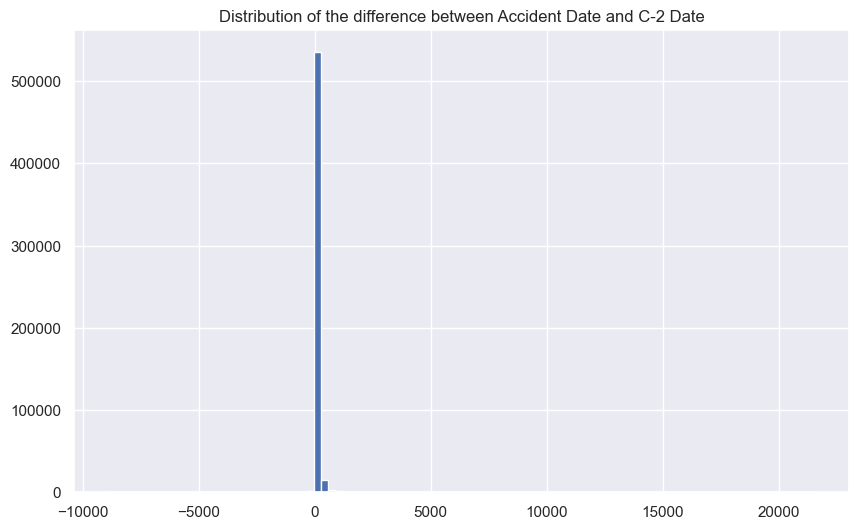

In [165]:
# C-2 Date and C-3 Date and First Hearing Date

# C-3 Date and First Hearing Date columns will be dropped since they don't seem important for the preditcion of the target varoable and they have high percentage of missing values.
# We can assign new dates for NaT for C2-Date columns. Let's first check how does the C-2 Date looks like compared to Accident Date.

# Calculate the difference between Accident Date and C-2 Date
train_data_copy_date = train_data.copy()
train_data_copy_date['Accident_C2_Difference'] = (train_data_copy_date['C-2 Date'] - train_data_copy_date['Accident Date']).dt.days

# Plot the distribution of the difference between Accident Date and C-2 Date
plt.figure(figsize=(10, 6))
plt.hist(train_data_copy_date['Accident_C2_Difference'], bins=100)
plt.title('Distribution of the difference between Accident Date and C-2 Date')

# Describe the difference between Accident Date and C-2 Date
train_data_copy_date['Accident_C2_Difference'].describe()
train_data_copy_date['Accident_C2_Difference'].median()

# We see that median for difference between Accident Date and C-2 Date is 10. We can fill the missing values with accident date + 10 days.

# Fill missing values in C2-Date with Accident Date + 10 days
train_data['C-2 Date'] = train_data['C-2 Date'].fillna(train_data['Accident Date'] + pd.Timedelta(days=10))

print(train_data[['C-2 Date']].isnull().sum())



In [166]:
# Drop C-3 Date and First Hearing Date columns
train_data.drop(columns=['C-3 Date', 'First Hearing Date'], inplace=True)

In [174]:
non_metric_cols.remove('C-3 Date')
non_metric_cols.remove('First Hearing Date')

In [169]:
# We also noticed that in C-2 Date there are 85 rows with C-2 Date before than Accident Date. We will also fill these with Accident Date + 10 days.
train_data.loc[train_data['C-2 Date'] < train_data['Accident Date'], 'C-2 Date'] = train_data['Accident Date'] + pd.Timedelta(days=10)

In [172]:
# Check descriptive statistics again to see what we are left with after missing value handling
dfSummary(train_data)


No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Accident Date[datetime64[ns]],"Min: 1961-09-06Max: 2023-09-29Duration: 22,668 days",5539 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABNCAYAAACxBha+AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABY0lEQVR4nO3XQY5SURBA0f8MQZj8H0LCYliEi3UR7IYYGNgdB+ACRG0c3O7Ec6b1KqnBnbxxv98nKHx67wP4f4iNzOq9D+BjGmNsp2la/8Pqj/v9/vJoIDZ+McbY7vf7L/M8757dvV6v38YYXx8FJzYeWc/zvDsejy/Lsry+delyuWxOp9PufD6vp2kSG2+3LMvr4XD4/uTa9ncDHwQyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjKrPw3HGJtpmj5Ht/BxzLfbbXW5XDbPLP3t/U87likkZGzxgwAAAABJRU5ErkJggg=="">",0(0.0%)
2,Age at Injury[int64],Mean (sd) : 42.4 (13.9)min < med < max:0.0 < 42.0 < 117.0IQR (CV) : 23.0 (3.1),108 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKQAAABACAYAAACUYNzVAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACWElEQVR4nO3dMY7aQBiG4X/CQgxEBkQCHS1FpBSUHCKHzRFSUKSh4QZ0CINAOHgx4DSbLCvtJrKx40/wPv2IKV4jzcCMXZIkBqh4V/YEgEsPZU/gNc65upnVMg4/JEmyz3M++H/kgnTO1bvd7lff9ztZxm+327Vz7luWKHkQyicXpJnVfN/vjMfjfavVitIM3Gw23mQy6QRBUDOzVHGU+SDgmWKQZmbWarWiXq/3M8PQesaPLOVBwEuyQZalhAcBF1hlQwpBQgpBQgpBQgpBQsrNrbJPp1PVzHznXNqh/vl8rhYwJaRwU0GGYViN4/jLYDCoVCqVVHuJcRx7p9PpcxRF380sy7YPcnBTQR4OhwfP8xqj0Sjq9/vrNGPn83lnNps1jsdjpaj54d9uKsjfms1m6s3t9XrNxrYAFjWQQpCQQpCQQpCQQpCQQpCQQpCQQpCQQpCQQpCQQpCQQpCQQpCQQpCQQpCQQpCQQpCQQpCQcpNHGMpwxWlHM67y+4Mgc3DNaUczrvK7RJA5uOa0I1f5vUSQOcpy2vEJJx6fsKiBFIKEFIKEFIKEFIKEFIKElMK2fa54CRH3NN6xQoK85iVE3NN434r6hsz8EiLuabxvhf5Sk+UlRNzTeN9Y1EAKQUIKQUIKQUIKQUIKQUIKQUIKQUIKQUIKQUIKQUIKQUIKQUIK57IFcA3Ls78Gyb++i8c1LC+9GWQe//peLpc/0o7d7XaemVkYht5isWjc+tjVavXB87zGcDh07Xb7Mc3Y/X7/fjqdfgqC4KNzbptmbMkekyR59eH7BSGBCwQLp1F0AAAAAElFTkSuQmCC"">",0(0.0%)
3,Alternative Dispute Resolution[bool],1. False2. True,"567,740 (99.5%)2,592 (0.5%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABG0lEQVR4nO3bMY6DMBRF0e/IiiaNLfQlFsMi0s4+ZxFsB/GLJKLxFJMsgWfJc09F+YorBAin1poBCsnMbmZ27T0Ewzuyu99LKVPvJRhbRGy5lDIty/Kstb56D8KY9n3/Wtd1ymZmtdbXPM+P3qMwtNul9wL8H8QGGWKDDLFBhtggQ2yQITbIEBtkiA0yxAYZYoMMsUGG2CBDbJAhNshks7+f23oPwbg+fSV3/+a3cJwtIjYOvEDlSBzlg8rnzmattWfnLRhcdve7mVlK6YfgcKZLKWV6vyDw3IZT8Z0NMsQGGWKDDLFBhtggQ2yQITbIEBtkiA0yxAYZYoMMsUGG2CBDbJAhNsgQG2SIDTI5Irb39dF1CYbHgRfI/ALJFjRJDx7WYQAAAABJRU5ErkJggg=="">",0(0.0%)
4,Assembly Date[datetime64[ns]],"Min: 2020-01-01Max: 2022-12-31Duration: 1,095 days",897 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABNCAYAAACxBha+AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8hTgPZAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACyElEQVR4nO3dsU7bUBiG4f8kBDlAHUWhYcvSsVKHjCy9g15s124gwQ1k6NKJBSFFwVFcohgnXahUVbLJceIvdvw+Kxw4w2uf3w4SbrPZGKDQOvQG0BzEBpmTQ28A23HOdc3stMDS1Wazedn3foogthpwznUHg8G3MAz7vmvn8/nMOfe9CsERWz2chmHYv76+fun1esttF0VRFNze3g6n0+mlc27u+Tv3fkckthrp9XrL4XD4e9vvj+O4kyTJl9Fo1G6321tHamb2/Py8cM79MDOvdZYTaaNj22EOMqvQLJRltVqdBEFwNh6Pl1dXV7Nt1z0+Pn64v7//OhqNLn0jzTu2GxvbLnOQWTlXflnOz8+97oiz2axbJNIoioK7u7v+dDo9NTNi+0ehOcisvCu/anwjfdPN+kKTYzMz/znIbLcrv+DAHq7X647PHquo8bHtwvfKLzqwJ0kSpGn6eblc3piZ752mMnJjO4YXiVVSdGB/eHjoTyaTs9fX13aZ+ytbZmyHeJG4Q9wtM1t7rjnY0VRkYC9zPyp5d7bCLxLznkiyFI07TdNOHMefLi4ufrVarWTbdcdyNNXJuzNbkQHacp5IchSK++2I+Tgej3828Wiqk8o9IPjG/feIaerRVCf8iRFkiA0yxAYZYoNMKQ8IaZp2zCx0zvksO4qPZJBt77E1/SMZZNt7bE3/SAbZSnvPxnsv/I8HBMgQG2SIDTLEBhligwyxQYbYIENskCE2yBAbZIgNMsQGGWKDDLFBhtggQ2yQITbIEBtkiA0yxAYZYoMMsUGG2CBDbJAhNsgQG2SIDTLEBhligwyxQYbYIENskCE2yBAbZIgNMsQGGWKDDLFBhtggQ2yQITbIEBtkiA0yxAYZYoMMsUGG2CBDbJAhNsgQG2SIDTLv/o/4KIoCnx+4

In [175]:
# 2. Data cleaning - Weird Values

# We have some assembly dates that are earlier than the accident date. We will drop these rows.
# Rows where 'Assembly Date' is earlier than 'Accident Date'
invalid_dates = train_data[train_data['Assembly Date'] < train_data['Accident Date']]
len(invalid_dates) # -> 1407 rows were spotted
train_data.drop(invalid_dates.index, inplace=True)

# Check for missing values again and length of data
print(((train_data.isnull().sum() / len(train_data)) * 100).sort_values(ascending=False))
print(len(train_data))

Accident Date                        0.0
Age at Injury                        0.0
WCB Decision                         0.0
Agreement Reached                    0.0
Zip Code                             0.0
WCIO Part Of Body Description        0.0
WCIO Part Of Body Code               0.0
WCIO Nature of Injury Description    0.0
WCIO Nature of Injury Code           0.0
WCIO Cause of Injury Description     0.0
WCIO Cause of Injury Code            0.0
Medical Fee Region                   0.0
Industry Code Description            0.0
Industry Code                        0.0
IME-4 Count                          0.0
Gender                               0.0
District Name                        0.0
COVID-19 Indicator                   0.0
County of Injury                     0.0
Claim Injury Type                    0.0
Carrier Type                         0.0
Carrier Name                         0.0
C-2 Date                             0.0
Birth Year                           0.0
Attorney/Represe

In [176]:
# 3. Data cleaning -Outliers and Class Imbalances

# Create thresholds for Age at Injury.

"""
Age minimum 14, since that is the legal lowest age for working in New York.
Age maximum 75.
- First we checked the amount of people in older age brakcets and saw that there were only 2401 people older than 75.
- We also saw that there were many people still over 64 (legal retirement age) so we decided to push the limit higher than 64.
- We believe that, although not supported by data, a higher age may correlate with an increased risk of injury. Therefore, we chose not to heavily factor this into our model.
"""

# Check amount of people who are older than 80
print(len(train_data[train_data['Age at Injury'] > 75]))

# Delete rows with Age at Injury over 75 and under 14
train_data = train_data[(train_data['Age at Injury'] >= 14) & (train_data['Age at Injury'] <= 75)]


2401


In [ ]:
# Check the length of the data
print(len(train_data))

# Check for max and min values in Birth Year
print(train_data['Birth Year'].min())
print(train_data['Birth Year'].max())

# We noticed that the lowest value in Birth Year is 0. We will fill the zeros similarly to null values for this column.
train_data.loc[train_data["Birth Year"] == 0, "Birth Year"] = train_data["Accident Date"].dt.year - train_data["Age at Injury"]

# Check for max and min values in Birth Year
print(train_data['Birth Year'].min())
print(train_data['Birth Year'].max())

# Check for maximum difference between age at injury and birth year. (Gap should be between -1 and 1 for valid data since some people may have had their birthday after/before the accident)
print((train_data['Accident Date'].dt.year - train_data['Birth Year'] - train_data['Age at Injury']).max())
print((train_data['Accident Date'].dt.year - train_data['Birth Year'] - train_data['Age at Injury']).min())

564702
0
2008
1920
2008
1
-1


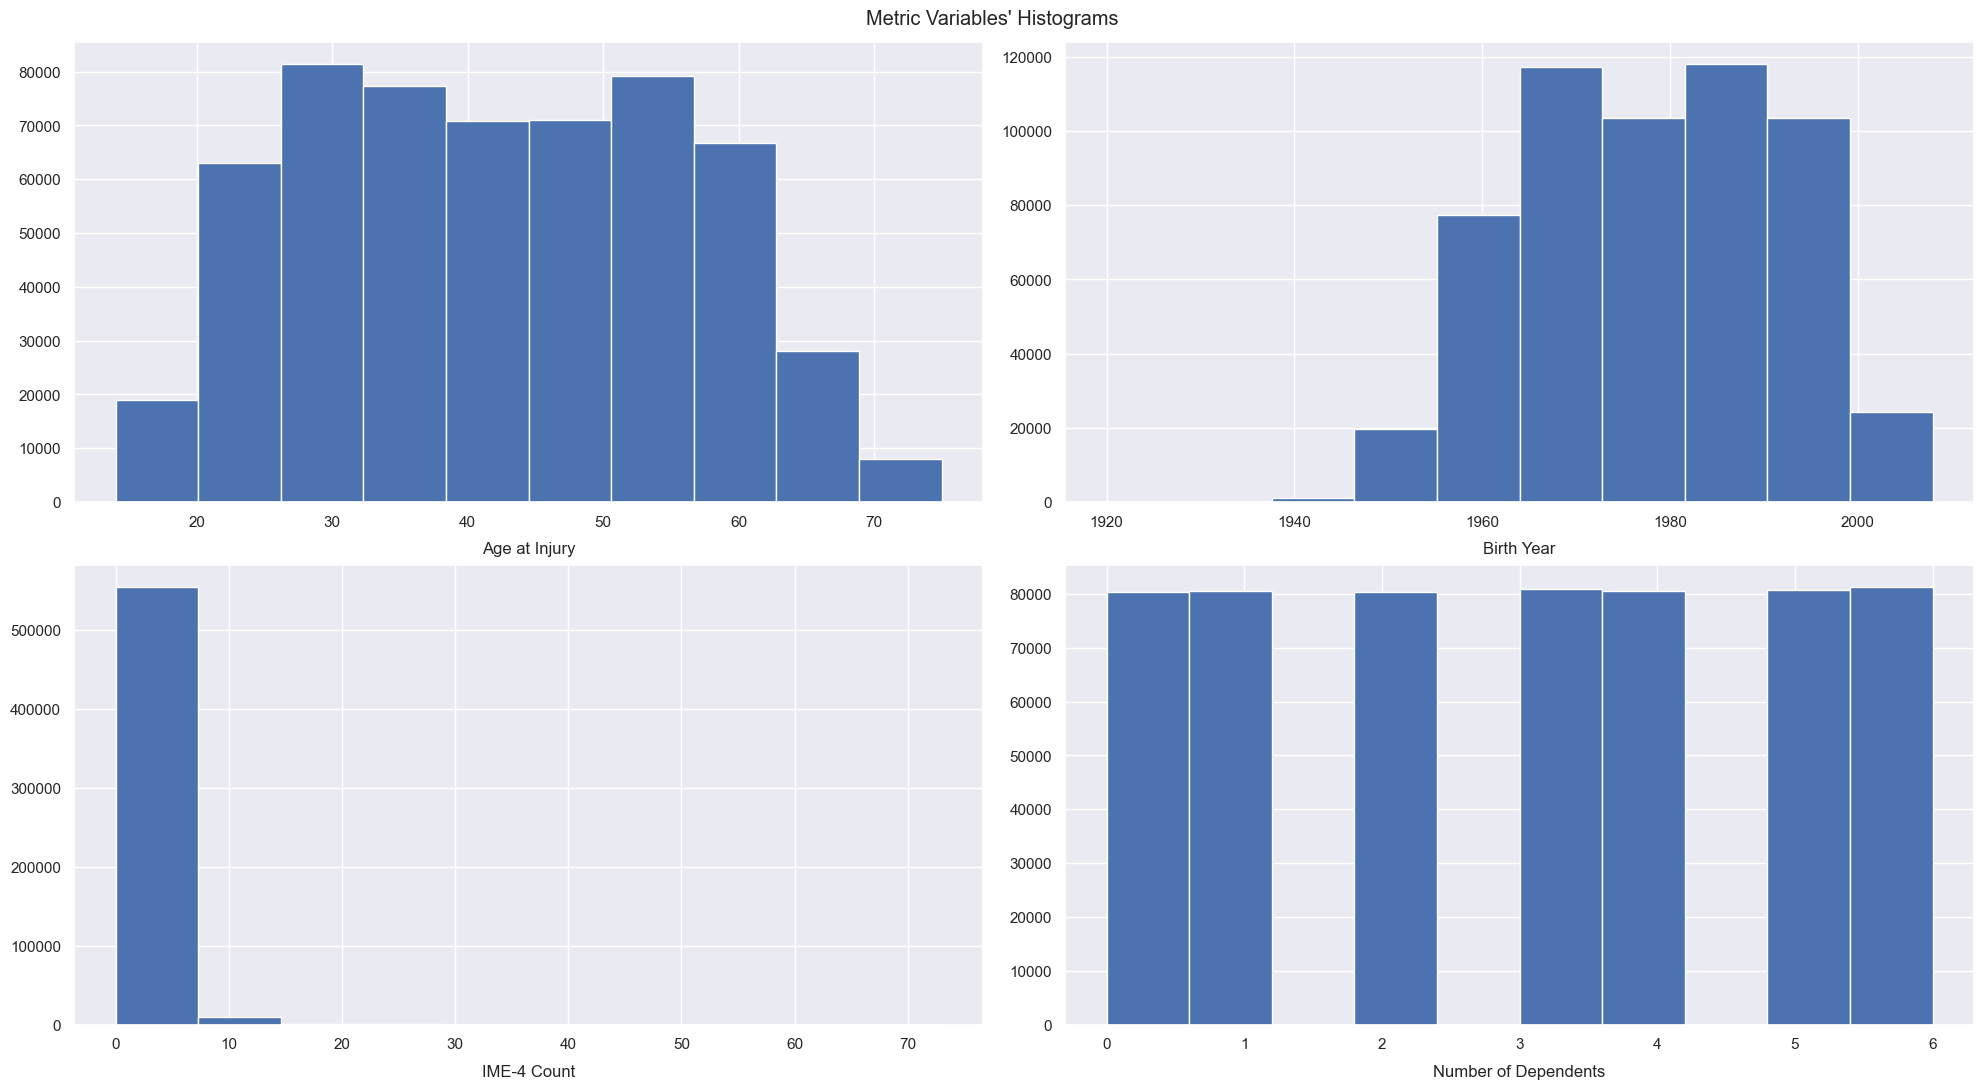

In [42]:
# 3. Data cleaning -Outliers and Class Imbalances

# Check for outliers in the numeric columns

# Using boxplot and historgams to identify outliers

#Histogram
# Plot all Numeric Variables' Histograms in one figure
sns.set() ## Reset to darkgrid

# Prepare figure. Create individual axes where each histogram will be placed
sp_rows = 2
sp_cols = ceil(len(metric_cols) / sp_rows) 


# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11),
                        tight_layout=True)

# Plot data
# Iterate across axes objects and associate each histogram
for ax, feat in zip(axes.flatten(), metric_cols): 
    ax.hist(train_data[feat])
    ax.set_title(feat, y=-0.13)
    
# Layout
# Add a centered title to the figure:
title = "Metric Variables' Histograms"

plt.suptitle(title)

plt.show()


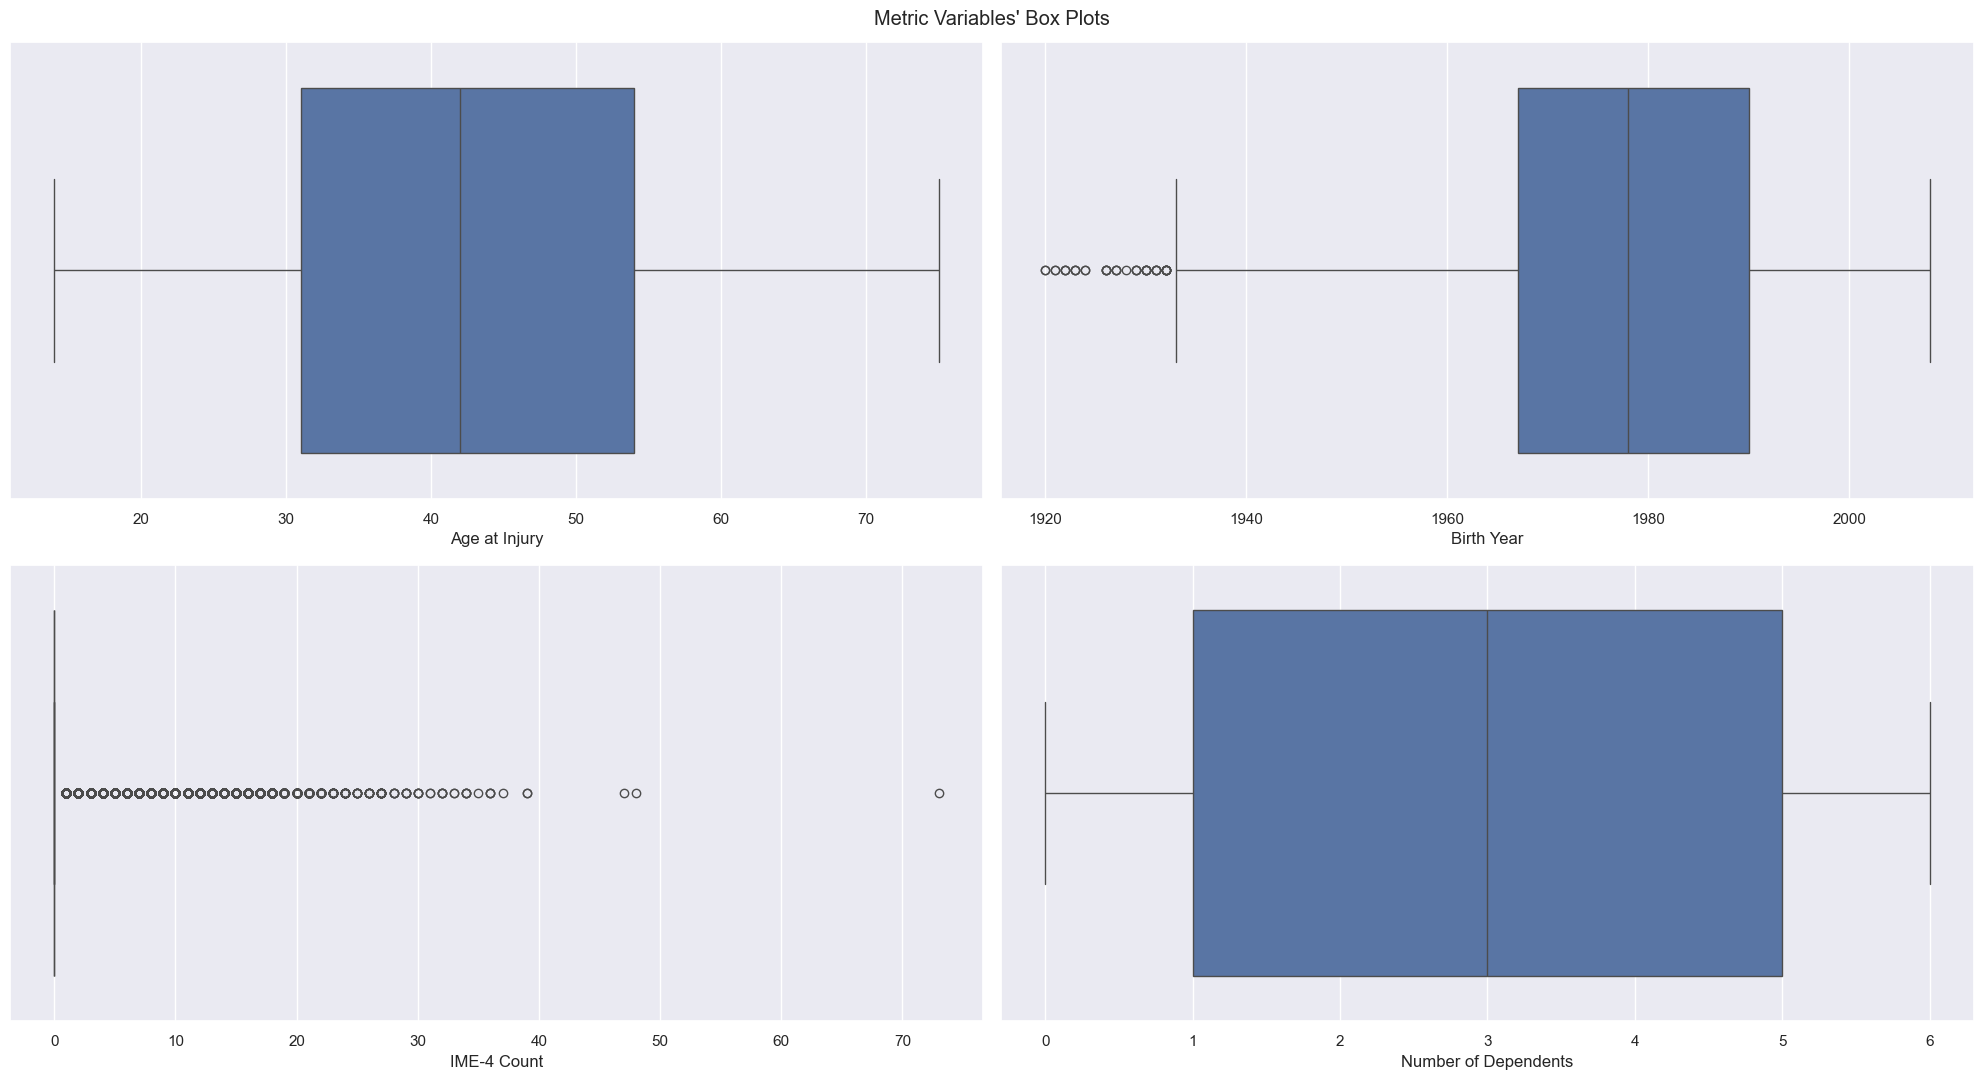

In [43]:
# Boxplots

# Plot ALL Numeric Variables' Boxplots in one figure

sns.set() ## Reset to darkgrid

sp_rows = 2
sp_cols = ceil(len(metric_cols) / sp_rows)


# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11),
                         tight_layout=True
                        )

# Plot data
# Iterate across axes objects and associate each histogram 
for ax, feat in zip(axes.flatten(), metric_cols): 
    sns.boxplot(x=train_data[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Metric Variables' Box Plots"

plt.suptitle(title)

plt.show()

In [51]:
# Check the amount of data dropped this far

original_length = 593471

print(original_length)
print(len(train_data))

dropped = (1-(len(train_data)/original_length))*100

print(dropped, " % of the data was dropped.")

593471
564702
4.847583116950959  % of the data was dropped.


In [54]:
# Let's go through the outliers and imbalance in the metric data column by column

# Age at Injury
"""
Outliers are already handled by the age limits set earlier.
"""

# Birth Year
"""
Birth year has outliers below lower whisker. We will drop these rows.
"""

# Get the outliers in Birth Year with IQR method
Q1 = train_data['Birth Year'].quantile(0.25)
Q3 = train_data['Birth Year'].quantile(0.75)
IQR = Q3 - Q1

# Get the indexes of the outliers
outliers_birth_year = train_data[(train_data['Birth Year'] < (Q1 - 1.5 * IQR)) | (train_data['Birth Year'] > (Q3 + 1.5 * IQR))]
# See the range of the outliers Birth Year
print(outliers_birth_year['Birth Year'].min())
print(outliers_birth_year['Birth Year'].max())

# Drop the outliers
train_data.drop(outliers_birth_year.index, inplace=True)
print(len(train_data))

dropped = (1-(len(train_data)/original_length))*100
print(dropped, " % of the data was dropped.")

1920
1932
564663
4.854154625921058  % of the data was dropped.


In [72]:
# Number of Dependents
print(train_data['Number of Dependents'].max())
print(train_data['Number of Dependents'].min())
"""
Number of Dependents doesn't have outleirs so we are fine
"""

# IME-4 Count
"""
According to the boxplot, there are outliers in IME-4 Count. Let's see how many there are with IQR method
"""

# Get the outliers in IME-4 Count with IQR method
Q1 = train_data['IME-4 Count'].quantile(0.25)
Q3 = train_data['IME-4 Count'].quantile(0.75)
IQR = Q3 - Q1

# Get the indexes of the outliers
outliers_ime_4 = train_data[(train_data['IME-4 Count'] < (Q1 - 1.5 * IQR)) | (train_data['IME-4 Count'] > (Q3 + 1.5 * IQR))]

# See the amount of the outliers IME-4 Count
print(len(outliers_ime_4))

# Chekc the range of the outliers IME-4 Count
print(outliers_ime_4['IME-4 Count'].min())
print(outliers_ime_4['IME-4 Count'].max())

"""
We noticed that the IQR is 0 and amount of outliers is over 130 000 rows with IQR method. We will try z-score method.
"""

# Calculate the z-scores
z_scores = stats.zscore(train_data['IME-4 Count'])

# Get the indexes of the outliers
outliers_ime_4 = train_data[(z_scores < -3) | (z_scores > 3)]
print(len(outliers_ime_4))

# Check the range of the outliers IME-4 Count
print(outliers_ime_4['IME-4 Count'].min())
print(outliers_ime_4['IME-4 Count'].max())

# We noticed that z-score gives more appropriate amount of outliers and more reasonable range of values in outliers.

# See how many rows in outliers_ime_4 has value less than 10
print(len(outliers_ime_4[outliers_ime_4['IME-4 Count'] < 10]))

# We see that amount of outliers is 8838 if we set the threshold to 10. We think that considering metadata of the column this is a reasonable threshold.
# Drop the rows that have IME-4 Count more than 10
train_data = train_data[train_data['IME-4 Count'] <= 10]

# Check the length of the data
print(len(train_data))

dropped = (1-(len(train_data)/original_length))*100
print(dropped, " % of the data was dropped.")


6.0
0.0
130735
1.0
73.0
14064
7.0
73.0
8838
560886
5.490579994641697  % of the data was dropped.


In [178]:
# 3. Data cleaning -Outliers and Class Imbalances

# Check for outliers in the non-numeric columns 

# NOTE: Instead of visual inspection, we will use the value_counts() method to identify outliers in the non-numeric columns.

# Get dates out of non-metric columns for visualisation
non_metric_cols_no_dates = [col for col in non_metric_cols if col not in ['Accident Date', 'Assembly Date', 'C-2 Date']]
# print(non_metric_cols_no_dates)

# Give the value counts for the non-numeric columns
for col in non_metric_cols_no_dates:
    print(train_data[col].value_counts(normalize=True, dropna=False))



Alternative Dispute Resolution
False    0.995421
True     0.004579
Name: proportion, dtype: float64
Attorney/Representative
False    0.687727
True     0.312273
Name: proportion, dtype: float64
Carrier Name
STATE INSURANCE FUND            0.194304
POLICE, FIRE, SANITATION        0.037800
AMERICAN ZURICH INSURANCE CO    0.030607
CHARTER OAK FIRE INS CO         0.029972
INDEMNITY INS. OF N AMERICA     0.025075
                                  ...   
LOWES HOME CENTERS INC          0.000002
WEST BEND MUTUAL INSURANCE      0.000002
LIVINGSTON-STEUBEN-             0.000002
NATIONAL AMERICAN INS CO        0.000002
HERMON-DEKALB CENTRAL           0.000002
Name: proportion, Length: 2027, dtype: float64
Carrier Type
1A. PRIVATE                                    0.497174
3A. SELF PUBLIC                                0.211664
2A. SIF                                        0.194304
4A. SELF PRIVATE                               0.092295
UNKNOWN                                        0.002865
5D.

In [78]:
# Alternnative Dispute resolution
"""
99.5 % of the data is 'False'. We will drop this column since it barely has any True values.
"""

# Drop the Alternative Dispute Resolution column
train_data.drop(columns=['Alternative Dispute Resolution'], inplace=True)
non_metric_cols.remove('Alternative Dispute Resolution')

In [82]:
# Attorney/Representative OK

# We will analyze the correlation between Carrier Name and Carrier Type because we assume they represent the same thing in different ways.

contingency_table = pd.crosstab(train_data['Carrier Type'], train_data['Carrier Name'])


chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

n = contingency_table.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

print("Cramér's V:", cramers_v)

# As we can see, the correlation between Carrier Name and Carrier Type is very high. We will drop Carrier Name column.

# Drop the Carrier Name column
train_data.drop(columns=['Carrier Name'], inplace=True)
non_metric_cols.remove('Carrier Name')

Cramér's V: 0.9709146987348377


In [106]:
# All the description columns can be dropped since they are just descriptions of the codes.

# Before dropping the columns, we will check that the codes are unique for each description (everywhere else than Industry Code since there mulitple codes can mean same descriptions)

# Check if the codes are unique for each description
print(train_data['WCIO Nature of Injury Code'].nunique() == train_data['WCIO Nature of Injury Description'].nunique())
# True so we are OK to drop without extra handling

print(train_data['WCIO Part Of Body Code'].nunique() == train_data['WCIO Part Of Body Description'].nunique())
# False so we need to handle this

# See amount of unique values in WCIO Part Of Body Description
print(train_data['WCIO Part Of Body Description'].nunique())

# See amount of unique values in WCIO Part Of Body Code
print(train_data['WCIO Part Of Body Code'].nunique())

# Find all unique pairs of WCIO Part Of Body Code and WCIO Part Of Body Description
# Make a copy of the data
train_data_copy = train_data.copy()
unique_pairs = train_data_copy[['WCIO Part Of Body Code', 'WCIO Part Of Body Description']].drop_duplicates()

# See the codes that have the same code but different descriptions
# print(unique_pairs['WCIO Part Of Body Description'].value_counts().sort_values(ascending=False))

# We found that Description DISC, SPINAL CORD and SOFT TISSUE have same Descriptions for different codes.
# We Chekced from metadata that these descriptions indeed have different codes. We are OK to drop this description columns.


print(train_data['WCIO Cause of Injury Code'].nunique() == train_data['WCIO Cause of Injury Description'].nunique())
# False so we need to handle this

# See amount of unique values in WCIO Part Of Body Description
print(train_data['WCIO Cause of Injury Code'].nunique())

# See amount of unique values in WCIO Part Of Body Code
print(train_data['WCIO Cause of Injury Description'].nunique())

# Find all unique pairs of WCIO Cause of Injury Code and WCIO Cause of Injury Description
# Make a copy of the data
train_data_copy = train_data.copy()
unique_pairs = train_data_copy[['WCIO Cause of Injury Code', 'WCIO Cause of Injury Description']].drop_duplicates()

# See the codes that have the same code but different descriptions
print(unique_pairs['WCIO Cause of Injury Description'].value_counts().sort_values(ascending=False))

# We found that Description OBJECT BEING LIFTED OR HANDLED and REPETITIVE MOTION have same Descriptions for different codes.
"""
We Chekced from metadata that these descriptions indeed have different codes. 
For REPETITIVE MOTION, we didn't find any information about the code. 
We will assume that this is OK since all the other descriptions with non-unique codes were OK as well
We are OK to drop this description columns.
"""


# Drop the description columns
train_data.drop(columns=['WCIO Part Of Body Description', 'WCIO Nature of Injury Description', 'WCIO Cause of Injury Description', 'Industry Code Description'], inplace=True)
non_metric_cols = [col for col in non_metric_cols if col not in ['WCIO Part Of Body Description', 'WCIO Nature of Injury Description', 'WCIO Cause of Injury Description', 'Industry Code Description']]



True
False
55
58
False
78
75
WCIO Cause of Injury Description
OBJECT BEING LIFTED OR HANDLED              3
REPETITIVE MOTION                           2
ON ICE OR SNOW                              1
ABSORPTION, INGESTION OR INHALATION, NOC    1
CUT, PUNCTURE, SCRAPE, NOC                  1
                                           ..
MOLD                                        1
ABNORMAL AIR PRESSURE                       1
CRASH OF WATER VEHICLE                      1
MOVING PART OF MACHINE                      1
CRASH OF AIRPLANE                           1
Name: count, Length: 75, dtype: int64


In [108]:
# Check again the value counts for the non-numeric columns

non_metric_cols_no_dates = [col for col in non_metric_cols if col not in ['Accident Date', 'Assembly Date', 'C-2 Date']]
# Give the value counts for the non-numeric columns
for col in non_metric_cols_no_dates:
    print(train_data[col].value_counts(normalize=True, dropna=False))

Attorney/Representative
False    0.692301
True     0.307699
Name: proportion, dtype: float64
Carrier Type
1A. PRIVATE                                    0.496354
3A. SELF PUBLIC                                0.212417
2A. SIF                                        0.194268
4A. SELF PRIVATE                               0.092388
UNKNOWN                                        0.002881
5D. SPECIAL FUND - UNKNOWN                     0.001681
5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)    0.000005
5C. SPECIAL FUND - POI CARRIER WCB MENANDS     0.000005
Name: proportion, dtype: float64
County of Injury
SUFFOLK       0.105052
QUEENS        0.101017
KINGS         0.092341
NASSAU        0.075768
BRONX         0.068946
                ...   
WYOMING       0.001328
MONTGOMERY    0.001077
SCHOHARIE     0.000984
YATES         0.000695
HAMILTON      0.000234
Name: proportion, Length: 63, dtype: float64
COVID-19 Indicator
False    0.951281
True     0.048719
Name: proportion, dtype: float64
District N

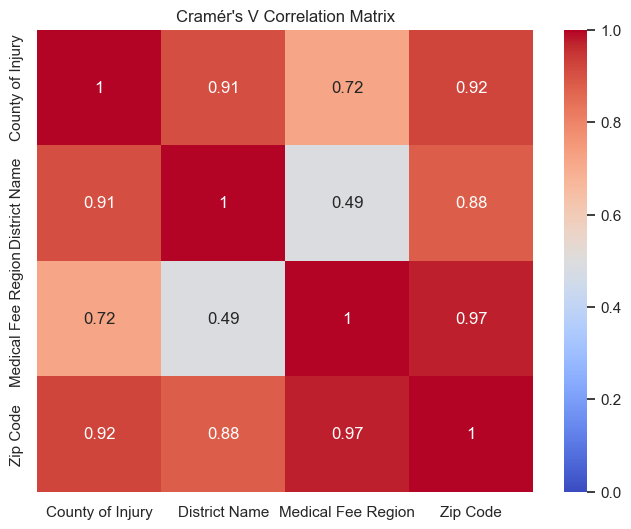

In [109]:
# County of Injury, District Name, Medical Fee Region and ZIP Code

"""
- ZIP Code is home address of the injured person.
- County of Injury is the name of NY county where the injury happened.
- District Name is name of WCB district office that oversees the area that the injury happened.
- Medical Fee Region is the approx. region where the medical treatment was given.

From Metadata we can assume that at least County of Injury and District Name essentially represent the same thing. (Same county of injury usually will have the same district office)

We will check the correlations between these columns with Cramer's V.
"""

def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)
    
    chi2, _, _, _ = stats.chi2_contingency(contingency_table)

    n = contingency_table.sum().sum()
    r, k = contingency_table.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

columns = ["County of Injury", "District Name", "Medical Fee Region", "Zip Code"]

cramers_v_matrix = pd.DataFrame(np.zeros((len(columns), len(columns))), 
                                index=columns, 
                                columns=columns)


for col1 in columns:
    for col2 in columns:
        if col1 != col2:
            cramers_v_matrix.loc[col1, col2] = cramers_v(train_data[col1], train_data[col2])
        else:
            cramers_v_matrix.loc[col1, col2] = 1 

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cramers_v_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title("Cramér's V Correlation Matrix")
plt.show()



In [110]:
# We can see from the cramer's v matrix that County of Injury has very high correlation with District Name and Zip Code.
# We can also see that Zip Code has very high correlation with County of Injury and District Name and Medical Fee Region.
# Only non-highly correlated columns are District Name and Medical Fee Region.

# We will drop County of Injury and Zip Code columns.
train_data.drop(columns=['County of Injury', 'Zip Code'], inplace=True)
non_metric_cols = [col for col in non_metric_cols if col not in ['County of Injury', 'Zip Code']]

* We can see from the cramer's v matrix that County of Injury has very high correlation with District Name and Zip Code.
* We can also see that Zip Code has very high correlation with County of Injury and District Name and Medical Fee Region.
* Only non-highly correlated columns are District Name and Medical Fee Region.

In [111]:
# Check again the value counts for the non-numeric columns

non_metric_cols_no_dates = [col for col in non_metric_cols if col not in ['Accident Date', 'Assembly Date', 'C-2 Date']]
# Give the value counts for the non-numeric columns
for col in non_metric_cols_no_dates:
    print(train_data[col].value_counts(normalize=True, dropna=False))

Attorney/Representative
False    0.692301
True     0.307699
Name: proportion, dtype: float64
Carrier Type
1A. PRIVATE                                    0.496354
3A. SELF PUBLIC                                0.212417
2A. SIF                                        0.194268
4A. SELF PRIVATE                               0.092388
UNKNOWN                                        0.002881
5D. SPECIAL FUND - UNKNOWN                     0.001681
5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)    0.000005
5C. SPECIAL FUND - POI CARRIER WCB MENANDS     0.000005
Name: proportion, dtype: float64
COVID-19 Indicator
False    0.951281
True     0.048719
Name: proportion, dtype: float64
District Name
NYC           0.470416
ALBANY        0.150929
HAUPPAUGE     0.105262
BUFFALO       0.079405
SYRACUSE      0.078171
ROCHESTER     0.070954
BINGHAMTON    0.038428
STATEWIDE     0.006434
Name: proportion, dtype: float64
Gender
M    0.582199
F    0.409529
U    0.008194
X    0.000078
Name: proportion, dtype: float6

In [113]:
# Covid-19 Indicator
# We can see that we have True only in 4.8% of the data. 
# We found that in WCIO Cause of Injury Code, code 83 is for COVID-19. That means that we could represent the COVID-19 Indicator with this column.

# Check for the Crames V between COVID-19 Indicator and WCIO Cause of Injury Code to assess the correlation between these columns.

contingency_table = pd.crosstab(train_data['COVID-19 Indicator'], train_data['WCIO Nature of Injury Code'])


chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

n = contingency_table.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

print("Cramér's V:", cramers_v)

# We can see that the correlation between COVID-19 Indicator and WCIO Cause of Injury Code is very high. We will drop COVID-19 Indicator column.

# Drop the COVID-19 Indicator column
train_data.drop(columns=['COVID-19 Indicator'], inplace=True)
non_metric_cols.remove('COVID-19 Indicator')

Cramér's V: 0.9662068988035184


Covid-19 Indicator
* We can see that we have True only in 4.8% of the data. 
* We found that in WCIO Cause of Injury Code, code 83 is for COVID-19. That means that we could represent the COVID-19 Indicator with this column.
* We can see that the correlation between COVID-19 Indicator and WCIO Cause of Injury Code is very high. We will drop COVID-19 Indicator column.


In [120]:
# Gender

# Check amount of data for rows with other than M and F
print(train_data['Gender'].value_counts())
train_data['Gender'].value_counts(normalize=True)

# Drop rows with other than M and F
train_data = train_data[train_data['Gender'].isin(['M', 'F'])]

print(len(train_data))

dropped = (1-(len(train_data)/original_length))*100
print(dropped, " % of the data is dropped.")

Gender
M    326547
F    229699
U      4596
X        44
Name: count, dtype: int64
556246
6.272421061854749  % of the data is dropped.


* Gender: We can see that we have only less than 0.1% of the data with other than M and F. We will drop these rows.

# About the target variable
- Our target varibale in first deliverable is Claim Injury Type
- For now WCB Decision and Agreement Reached are not consideres as features, but later in project we will use them as target variables.
    - We will exclude them from columns

In [124]:
# Data Class Imbalances
# Check for class imbalances in the target value
print(train_data['Claim Injury Type'].value_counts(normalize=True))

# exclude the WCB Decision column and Agreement Reached column from the train data
train_data.drop(columns=['WCB Decision', 'Agreement Reached'], inplace=True)
non_metric_cols = [col for col in non_metric_cols if col not in ['WCB Decision', 'Agreement Reached']]


Claim Injury Type
2. NON-COMP        0.510175
4. TEMPORARY       0.257070
3. MED ONLY        0.121362
5. PPD SCH LOSS    0.084481
1. CANCELLED       0.018900
6. PPD NSL         0.007112
8. DEATH           0.000775
7. PTD             0.000126
Name: proportion, dtype: float64


/var/folders/hr/bvcr3w9n2gxgqdhjgthjjnv80000gn/T/ipykernel_36215/2210397235.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(columns=['WCB Decision', 'Agreement Reached'], inplace=True)


* We can see that the target variable has some categroies that only appear less than 1% of the data. Keep this in mind in model training. (Possibility to overfit)

In [125]:
# Let see all the columns that we have left
print(train_data.columns)
print(len(train_data.columns))

Index(['Accident Date', 'Age at Injury', 'Assembly Date',
       'Attorney/Representative', 'Birth Year', 'C-2 Date', 'C-3 Date',
       'Carrier Type', 'Claim Injury Type', 'District Name',
       'First Hearing Date', 'Gender', 'IME-4 Count', 'Industry Code',
       'Medical Fee Region', 'WCIO Cause of Injury Code',
       'WCIO Nature of Injury Code', 'WCIO Part Of Body Code',
       'Number of Dependents'],
      dtype='object')
19


# Feature engineering

## Creation of new features

* Time Until Injury Reported

# Feature Selection

## Deleting features that mean the same thing 
- Such as Age at Injury/ Birthday
- Such as all the codes/Description fields

# Bivariate Analysis (metric)


## Start with pandas-profiling analysis for only metric values



In [48]:
# # To get initial but comprehensive report on the data, we can use ProfileReport
# profile = ProfileReport(
#     train_data,
#     title='New York Workers’ Compensation Board Data',
#     correlations={
#         "pearson": {"calculate": True},   # Linear correlation
#         "spearman": {"calculate": True},  # Non-linear/ordinal correlation
#         "kendall": {"calculate": True},   # For ranked data
#         "phi_k": {"calculate": True},     # Categorical correlation
#         "cramers": {"calculate": True},   # Association between categorical variables
#     },
#     missing_diagrams={
#         "bar": True,          # Bar chart for missing data
#         "matrix": True,       # Heatmap-like missing data matrix
#         "dendrogram": True,   # Hierarchical clustering of missing values
#     },
#     interactions={"continuous": True},  # Highlight continuous feature interactions
# )

# profile.to_notebook_iframe()


## All Scatter plots in one image

### Then more styled and better scatter plots for scatter plots of interest



## Pearson's correlation matrix


### Number of correlation is not enough, need to check for non-linear relationships as well

# Non-metric variables analysis

# Comparing non-metric variables to metrics

# Threeway ANOVA

# Correlation of variables to the target variables
* Append target variables back to datasets and only try to find variable correlations to them.
* Try to find variables that have correlation with variables we are trying to predict


# Summary of all correlations

* High correlations
* Redundancies
* Irrelevancies

# Feature engineering (Creation of new features)

# Variable Scaling (Normalization/Standardization)

# Model selection - Training and selection

## Keep in mind, the unbalance of the target variable categories. If model performance is not good, try deleting rows with minority Claim Injury Types

Claim Injury Type
- 2. NON-COMP        0.510175
- 4. TEMPORARY       0.257070
- 3. MED ONLY        0.121362
- 5. PPD SCH LOSS    0.084481
- 1. CANCELLED       0.018900
- 6. PPD NSL         0.007112
- 8. DEATH           0.000775
- 7. PTD             0.000126

# Model assessment